In [198]:
import numpy as np
import matplotlib.pyplot as plt
import math
erf = np.vectorize(math.erf)

def bake_cake(max_radius, orientation, angle, b_n = B_spline(2), resolution=(256,256), freq_max=.5, cake_type='basic'):
    '''
        Generate cake wavelet mask

            
    '''

    X,Y = create_mesh(resolution)

    radial_coord, angular_coord = transform_cartesian_to_radial(X,Y)
    
    assert radial_coord.shape == angular_coord.shape
    assert np.alltrue(angular_coord>0)

    if cake_type == 'basic':
        values = basic_cake(radial_coord, angular_coord, orientation, angle, freq_max)
    elif cake_type == 'b_spline':
        # Shift center of spline to orientation
        shifted = (angular_coord-orientation + np.pi)%(2*np.pi) - np.pi
        values = b_n(shifted) * (1-erf(10*(radial_coord-freq_max)))

    X,Y = transform_radial_to_cartesian(radial_coord, angular_coord)
    return np.stack([X, Y, values])

def create_mesh(resolution):
    x_dim, y_dim = resolution
    
    X = np.linspace(-1, 1, x_dim)
    X = X[:, None].repeat(y_dim, axis=1)

    Y = np.linspace(-1, 1, y_dim)
    Y = Y[None, :].repeat(X.shape[0], axis=0)
    return X, Y
    
def basic_cake(radial_coord, angular_coord, orientation, angle, freq_max):
    values = np.zeros(angular_coord.shape)
    start = (orientation - angle/2) % (2*np.pi)
    end = (orientation + angle/2) % (2*np.pi)
    if start>=end:
        # Catch if the angle overflows and loops around
        angle_idx = np.logical_or(start < angular_coord, angular_coord < end)
        radial_idx = radial_coord<freq_max
        idx = np.logical_and(angle_idx, radial_idx)
        values[idx] = 1
    else:
        # Between start and last
        angle_idx = np.logical_and(start < angular_coord, angular_coord < end)
        radial_idx = radial_coord<freq_max
        idx = np.logical_and(angle_idx,radial_idx)
        values[idx] = 1
    return values

def calculate_boundaries(max_radius, slices, radius_ticks):
    radial_coord = np.arange(0, max_radius, radius_ticks)
    radial_coord = radial_coord[:, None].repeat(slices, axis=1)

    angular_coord = np.linspace(0, 360, slices, endpoint=False)
    angular_coord = angular_coord[:, None].repeat(radial_coord.shape[0], axis=1).T

    assert radial_coord.shape == angular_coord.shape

    values = np.ones(angular_coord.shape)

    X,Y = transform_radial_to_cartesian(radial_coord, angular_coord, degrees=True)
    
    return np.stack([X, Y])

def transform_cartesian_to_radial(X, Y):
    '''
        Convert to polar coordinates
        Input:
            X : x-domain discretized into N bins repeated M times (N x M)
            Y : y-domain discretized into M bins repeated N times (N x M)
        Return:
            r : The corresponding radial coordinate
            theta : The corresponding angular coordinate
    '''
    r = np.sqrt(X**2 + Y**2)
    ang = np.arctan2(X,Y) + np.pi
    return r, ang

def transform_radial_to_cartesian(rad, ang, degrees=False):
    '''
        Convert to Cartesian coordinates
        Input:
            r : The corresponding radial coordinate
            theta : The corresponding angular coordinate
        Return:
            X : x coordinate
            Y : y coordinate
    '''
    ang = ang
    if degrees==True:
        ang = np.deg2rad(ang)
    X = rad*np.cos(ang)
    Y = rad*np.sin(ang)
    return X, Y


[1.19712343e-09 1.89098890e-09 2.96338645e-09 ... 6.25859603e-24
 1.34671393e-23 4.61137280e-24]


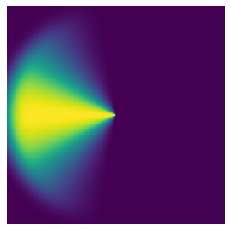

[2.00167462e-09 3.16981186e-09 4.98014761e-09 ... 2.50343841e-24
 2.58649911e-23 3.38348500e-24]


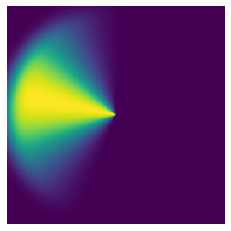

[2.88658420e-09 4.58861174e-09 7.23675827e-09 ... 6.21560275e-24
 1.05402807e-23 6.65103943e-24]


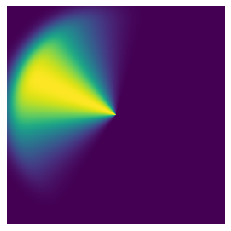

[3.40074375e-09 5.42215649e-09 8.57744878e-09 ... 5.33172555e-23
 4.69531412e-23 1.29324956e-23]


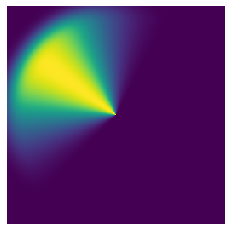

[3.50357566e-09 5.59874487e-09 8.87702316e-09 ... 6.15615573e-23
 2.58649911e-23 6.65103943e-24]


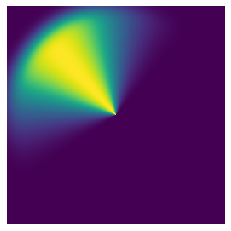

[3.19507993e-09 5.11837688e-09 8.13548138e-09 ... 1.05402807e-23
 6.65103943e-24 4.16428924e-24]


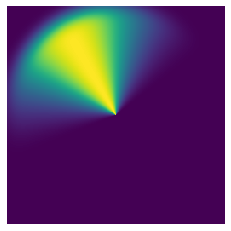

[2.47525656e-09 3.98105252e-09 6.35282346e-09 ... 4.00550146e-23
 2.58649911e-23 1.65749407e-23]


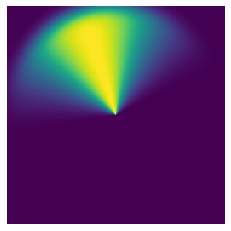

[1.57369105e-09 2.53765069e-09 4.06041954e-09 ... 7.10896740e-23
 4.69531412e-23 4.16428924e-24]


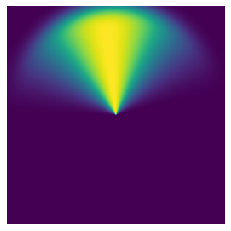

[8.71971763e-10 1.41071753e-09 2.26464207e-09 ... 2.36059719e-22
 6.15615573e-23 8.28747034e-24]


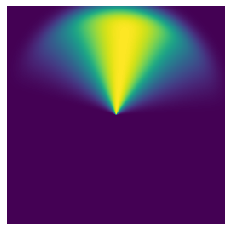

[3.75916299e-10 6.12262553e-10 9.89422680e-10 ... 1.29324956e-23
 3.32551971e-24 2.08214462e-24]


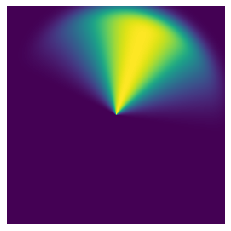

[8.55246545e-11 1.42285764e-10 2.34761360e-10 ... 1.59389601e-22
 9.39062824e-23 5.27014034e-24]


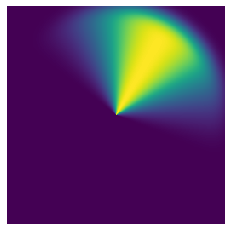

[5.49374314e-14 1.10837499e-12 5.05833706e-12 ... 2.00275073e-23
 1.29324956e-23 2.08214462e-24]


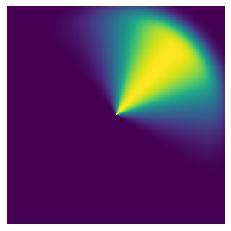

[1.97641071e-24 2.81889757e-24 1.23518914e-25 ... 3.64513821e-11
 2.53891221e-11 1.74527644e-11]


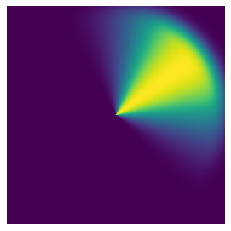

[3.05814991e-24 3.95260525e-24 4.04140486e-24 ... 4.91538330e-10
 3.18777530e-10 2.05012499e-10]


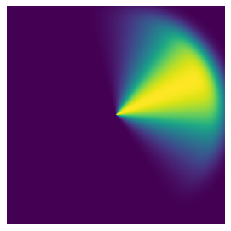

[1.06183214e-23 1.87757881e-24 9.18378852e-22 ... 1.46718335e-09
 9.40644123e-10 5.98236054e-10]


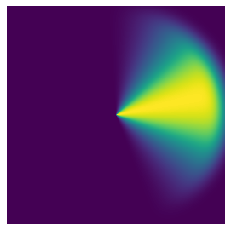

[4.61137280e-24 1.34671393e-23 4.04140486e-24 ... 2.96338645e-09
 1.89098890e-09 1.19712343e-09]


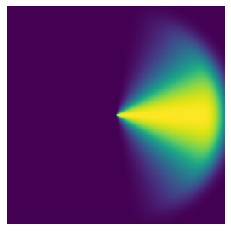

[4.42455731e-24 2.90982975e-24 8.56397805e-24 ... 4.98014761e-09
 3.16981186e-09 2.00167462e-09]


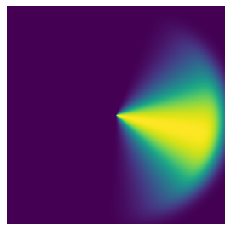

[1.20550090e-23 1.05402807e-23 8.28747034e-24 ... 7.23675827e-09
 4.58861174e-09 2.88658420e-09]


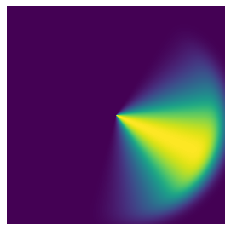

[7.43618494e-23 5.33172555e-23 7.67194087e-22 ... 8.57744878e-09
 5.42215649e-09 3.40074375e-09]


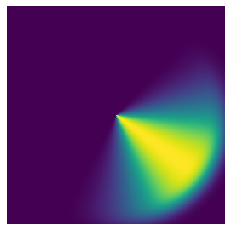

[2.58649911e-23 6.15615573e-23 1.42179348e-22 ... 8.87702316e-09
 5.59874487e-09 3.50357566e-09]


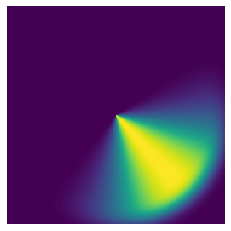

[4.16428924e-24 1.05402807e-23 3.18779202e-22 ... 8.13548138e-09
 5.11837688e-09 3.19507993e-09]


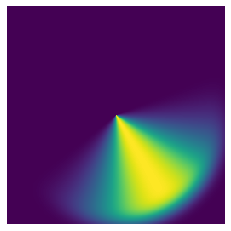

[1.65749407e-23 2.58649911e-23 4.00550146e-23 ... 6.35282346e-09
 3.98105252e-09 2.47525656e-09]


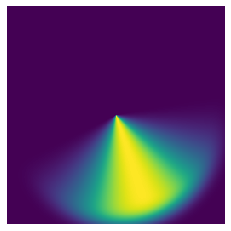

[2.08214462e-24 4.69531412e-23 2.13678072e-22 ... 4.06041954e-09
 2.53765069e-09 1.57369105e-09]


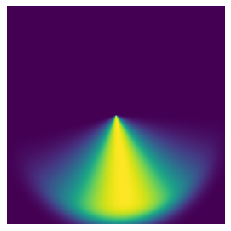

[8.28747034e-24 6.15615573e-23 4.69531412e-23 ... 2.26464207e-09
 1.41071753e-09 8.71971763e-10]


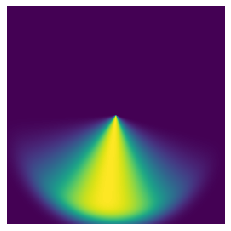

[2.08214462e-24 3.32551971e-24 1.29324956e-23 ... 9.89422680e-10
 6.12262553e-10 3.75916299e-10]


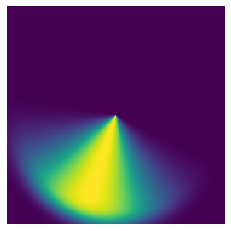

[2.08214462e-24 1.05402807e-23 9.39062824e-23 ... 2.34761360e-10
 1.42285764e-10 8.55246545e-11]


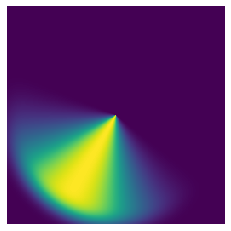

[2.08214462e-24 1.29324956e-23 2.00275073e-23 ... 1.10837499e-12
 5.49374314e-14 3.15715310e-24]


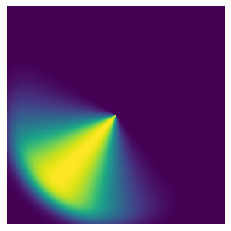

[1.74527644e-11 2.53891221e-11 3.64513821e-11 ... 2.97830965e-24
 1.23518914e-25 1.97641071e-24]


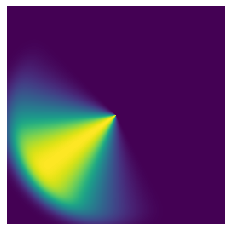

[2.05012499e-10 3.18777530e-10 4.91538330e-10 ... 6.66831802e-24
 7.76950344e-24 2.96179100e-24]


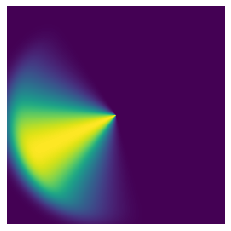

[5.98236054e-10 9.40644123e-10 1.46718335e-09 ... 1.87757881e-24
 1.06183214e-23 2.07844982e-25]


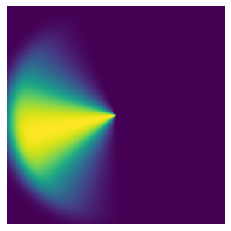

<Figure size 432x288 with 0 Axes>

In [199]:
slices = 30
angle = 2*np.pi/slices
angles = np.linspace(0,2*np.pi, slices, endpoint=False)
filenames = []

for i, orientation in enumerate(angles):
    X, Y, val = bake_cake(1, orientation, angle, cake_type='b_spline')

    bx, by = calculate_boundaries(1, slices, radius_ticks=.5)

    plt.imshow(val*255)
    print(val[val>0])
    plt.axis('off')

    filenames+=['/Thesis/images/cake_'+str(i) +'.png']
    plt.savefig('/Thesis/images/cake_'+str(i) +'.png')
    plt.show()
    plt.clf()

import imageio
with imageio.get_writer('/Thesis/movie.gif', mode='I', duration=.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [134]:
"""
Implementation for B-splines of degree up to 50. For speed considerations the
splines of degrees up to 50 are hard-coded. This file was generated using a 
Wolfram Mathematica script in which the expressions are generated via the inverse Fourier transform
of the Fourier B-spline expression
   BF[n_][w_]:=(Sin[w/2]/(w/2))^(n+1)
with handling of the case w = 0 via
   Do[BF[n][0]=1;BF[n][0.]=1;,{n,0,nMax}]
and the spatial/time domain B-spline expression is then obtained via
   InverseFourierTransform[BF[n][w],w,x,FourierParameters{1,-1}]

File created Wed 18 Dec 2019 12:49:01
@author: EJ Bekkers, Institute for Informatics, University of Amsterdam, The Netherlands
"""

## The 1-dimensional B-spline
def B_spline(n, scale=1.):
    """ Returns a 1D B-spline basis function of degree "n" (centered around
        zero).

        INPUT:
            - degree n, an integer

        OUTPUT:
            - func, a python function which takes as input a position x, or a
                tf tensor array of positions, and returns the function value(s) 
                of the B-Spline basis function.
    """
    if (n >= 0) and (n <=50):
        func = eval('_B_'+str(n)+'()')
    else:
        if n<=0:
            raise ValueError('Error, spline degree should be a positive integer!')
        if n>=50:
            raise ValueError('Error, spline degree too high! Currently only B-splines up to degree 50 are implemented.')
    return lambda x: func(x/scale)

def _B_0():
    def B(x):
        return (np.sign(1/2 - x) + np.sign(1/2 + x))/2
    return B

def _B_1():
    def B(x):
        return (-((-1 + x)*np.sign(1 - x)) - 2*x*np.sign(x) + (1 + x)*np.sign(1 + x))/2
    return B

def _B_2():
    def B(x):
        return (-3*(-1/2 + x)**2*np.sign(1/2 - x) + (-3/2 + x)**2*np.sign(3/2 - x) - (3*(1 + 2*x)**2*np.sign(1/2 + x))/4 + ((3 + 2*x)**2*np.sign(3/2 + x))/4)/4
    return B

def _B_3():
    def B(x):
        return (4*(-1 + x)**3*np.sign(1 - x) - (-2 + x)**3*np.sign(2 - x) + 6*x**3*np.sign(x) - 4*(1 + x)**3*np.sign(1 + x) + (2 + x)**3*np.sign(2 + x))/12
    return B

def _B_4():
    def B(x):
        return (10*(-1/2 + x)**4*np.sign(1/2 - x) - 5*(-3/2 + x)**4*np.sign(3/2 - x) + (-5/2 + x)**4*np.sign(5/2 - x) + (5*(1 + 2*x)**4*np.sign(1/2 + x))/8 - 5*(3/2 + x)**4*np.sign(3/2 + x) + ((5 + 2*x)**4*np.sign(5/2 + x))/16)/48
    return B

def _B_5():
    def B(x):
        return (-15*(-1 + x)**5*np.sign(1 - x) + 6*(-2 + x)**5*np.sign(2 - x) - (-3 + x)**5*np.sign(3 - x) - 20*x**5*np.sign(x) + 15*(1 + x)**5*np.sign(1 + x) - 6*(2 + x)**5*np.sign(2 + x) + (3 + x)**5*np.sign(3 + x))/240
    return B

def _B_6():
    def B(x):
        return (-35*(-1/2 + x)**6*np.sign(1/2 - x) + 21*(-3/2 + x)**6*np.sign(3/2 - x) - 7*(-5/2 + x)**6*np.sign(5/2 - x) + (-7/2 + x)**6*np.sign(7/2 - x) - 35*(1/2 + x)**6*np.sign(1/2 + x) + (21*(3 + 2*x)**6*np.sign(3/2 + x))/64 - 7*(5/2 + x)**6*np.sign(5/2 + x) + ((7 + 2*x)**6*np.sign(7/2 + x))/64)/1440
    return B

def _B_7():
    def B(x):
        return (56*(-1 + x)**7*np.sign(1 - x) - 28*(-2 + x)**7*np.sign(2 - x) + 8*(-3 + x)**7*np.sign(3 - x) - (-4 + x)**7*np.sign(4 - x) + 70*x**7*np.sign(x) - 56*(1 + x)**7*np.sign(1 + x) + 28*(2 + x)**7*np.sign(2 + x) - 8*(3 + x)**7*np.sign(3 + x) + (4 + x)**7*np.sign(4 + x))/10080
    return B

def _B_8():
    def B(x):
        return (126*(-1/2 + x)**8*np.sign(1/2 - x) - 84*(-3/2 + x)**8*np.sign(3/2 - x) + 36*(-5/2 + x)**8*np.sign(5/2 - x) - 9*(-7/2 + x)**8*np.sign(7/2 - x) + (-9/2 + x)**8*np.sign(9/2 - x) + (63*(1 + 2*x)**8*np.sign(1/2 + x))/128 - 84*(3/2 + x)**8*np.sign(3/2 + x) + (9*(5 + 2*x)**8*np.sign(5/2 + x))/64 - 9*(7/2 + x)**8*np.sign(7/2 + x) + ((9 + 2*x)**8*np.sign(9/2 + x))/256)/80640
    return B

def _B_9():
    def B(x):
        return (-210*(-1 + x)**9*np.sign(1 - x) + 120*(-2 + x)**9*np.sign(2 - x) - 45*(-3 + x)**9*np.sign(3 - x) + 10*(-4 + x)**9*np.sign(4 - x) - (-5 + x)**9*np.sign(5 - x) - 252*x**9*np.sign(x) + 210*(1 + x)**9*np.sign(1 + x) - 120*(2 + x)**9*np.sign(2 + x) + 45*(3 + x)**9*np.sign(3 + x) - 10*(4 + x)**9*np.sign(4 + x) + (5 + x)**9*np.sign(5 + x))/725760
    return B

def _B_10():
    def B(x):
        return (-462*(-1/2 + x)**10*np.sign(1/2 - x) + 330*(-3/2 + x)**10*np.sign(3/2 - x) - 165*(-5/2 + x)**10*np.sign(5/2 - x) + 55*(-7/2 + x)**10*np.sign(7/2 - x) - 11*(-9/2 + x)**10*np.sign(9/2 - x) + (-11/2 + x)**10*np.sign(11/2 - x) - 462*(1/2 + x)**10*np.sign(1/2 + x) + (165*(3 + 2*x)**10*np.sign(3/2 + x))/512 - 165*(5/2 + x)**10*np.sign(5/2 + x) + 55*(7/2 + x)**10*np.sign(7/2 + x) - 11*(9/2 + x)**10*np.sign(9/2 + x) + (11/2 + x)**10*np.sign(11/2 + x))/7257600
    return B

def _B_11():
    def B(x):
        return (792*(-1 + x)**11*np.sign(1 - x) - 495*(-2 + x)**11*np.sign(2 - x) + 220*(-3 + x)**11*np.sign(3 - x) - 66*(-4 + x)**11*np.sign(4 - x) + 12*(-5 + x)**11*np.sign(5 - x) - (-6 + x)**11*np.sign(6 - x) + 924*x**11*np.sign(x) - 792*(1 + x)**11*np.sign(1 + x) + 495*(2 + x)**11*np.sign(2 + x) - 220*(3 + x)**11*np.sign(3 + x) + 66*(4 + x)**11*np.sign(4 + x) - 12*(5 + x)**11*np.sign(5 + x) + (6 + x)**11*np.sign(6 + x))/79833600
    return B

def _B_12():
    def B(x):
        return (1716*(-1/2 + x)**12*np.sign(1/2 - x) - 1287*(-3/2 + x)**12*np.sign(3/2 - x) + 715*(-5/2 + x)**12*np.sign(5/2 - x) - 286*(-7/2 + x)**12*np.sign(7/2 - x) + 78*(-9/2 + x)**12*np.sign(9/2 - x) - 13*(-11/2 + x)**12*np.sign(11/2 - x) + (-13/2 + x)**12*np.sign(13/2 - x) + (429*(1 + 2*x)**12*np.sign(1/2 + x))/1024 - 1287*(3/2 + x)**12*np.sign(3/2 + x) + 715*(5/2 + x)**12*np.sign(5/2 + x) - 286*(7/2 + x)**12*np.sign(7/2 + x) + 78*(9/2 + x)**12*np.sign(9/2 + x) - 13*(11/2 + x)**12*np.sign(11/2 + x) + (13/2 + x)**12*np.sign(13/2 + x))/958003200
    return B

def _B_13():
    def B(x):
        return (-3003*(-1 + x)**13*np.sign(1 - x) + 2002*(-2 + x)**13*np.sign(2 - x) - 1001*(-3 + x)**13*np.sign(3 - x) + 364*(-4 + x)**13*np.sign(4 - x) - 91*(-5 + x)**13*np.sign(5 - x) + 14*(-6 + x)**13*np.sign(6 - x) - (-7 + x)**13*np.sign(7 - x) - 3432*x**13*np.sign(x) + 3003*(1 + x)**13*np.sign(1 + x) - 2002*(2 + x)**13*np.sign(2 + x) + 1001*(3 + x)**13*np.sign(3 + x) - 364*(4 + x)**13*np.sign(4 + x) + 91*(5 + x)**13*np.sign(5 + x) - 14*(6 + x)**13*np.sign(6 + x) + (7 + x)**13*np.sign(7 + x))/12454041600
    return B

def _B_14():
    def B(x):
        return (-6435*(-1/2 + x)**14*np.sign(1/2 - x) + 5005*(-3/2 + x)**14*np.sign(3/2 - x) - 3003*(-5/2 + x)**14*np.sign(5/2 - x) + 1365*(-7/2 + x)**14*np.sign(7/2 - x) - 455*(-9/2 + x)**14*np.sign(9/2 - x) + 105*(-11/2 + x)**14*np.sign(11/2 - x) - 15*(-13/2 + x)**14*np.sign(13/2 - x) + (-15/2 + x)**14*np.sign(15/2 - x) - 6435*(1/2 + x)**14*np.sign(1/2 + x) + 5005*(3/2 + x)**14*np.sign(3/2 + x) - 3003*(5/2 + x)**14*np.sign(5/2 + x) + 1365*(7/2 + x)**14*np.sign(7/2 + x) - 455*(9/2 + x)**14*np.sign(9/2 + x) + 105*(11/2 + x)**14*np.sign(11/2 + x) - 15*(13/2 + x)**14*np.sign(13/2 + x) + (15/2 + x)**14*np.sign(15/2 + x))/174356582400
    return B

def _B_15():
    def B(x):
        return (11440*(-1 + x)**15*np.sign(1 - x) - 8008*(-2 + x)**15*np.sign(2 - x) + 4368*(-3 + x)**15*np.sign(3 - x) - 1820*(-4 + x)**15*np.sign(4 - x) + 560*(-5 + x)**15*np.sign(5 - x) - 120*(-6 + x)**15*np.sign(6 - x) + 16*(-7 + x)**15*np.sign(7 - x) - (-8 + x)**15*np.sign(8 - x) + 12870*x**15*np.sign(x) - 11440*(1 + x)**15*np.sign(1 + x) + 8008*(2 + x)**15*np.sign(2 + x) - 4368*(3 + x)**15*np.sign(3 + x) + 1820*(4 + x)**15*np.sign(4 + x) - 560*(5 + x)**15*np.sign(5 + x) + 120*(6 + x)**15*np.sign(6 + x) - 16*(7 + x)**15*np.sign(7 + x) + (8 + x)**15*np.sign(8 + x))/2615348736000
    return B

def _B_16():
    def B(x):
        return (24310*(-1/2 + x)**16*np.sign(1/2 - x) - 19448*(-3/2 + x)**16*np.sign(3/2 - x) + 12376*(-5/2 + x)**16*np.sign(5/2 - x) - 6188*(-7/2 + x)**16*np.sign(7/2 - x) + 2380*(-9/2 + x)**16*np.sign(9/2 - x) - 680*(-11/2 + x)**16*np.sign(11/2 - x) + 136*(-13/2 + x)**16*np.sign(13/2 - x) - 17*(-15/2 + x)**16*np.sign(15/2 - x) + (-17/2 + x)**16*np.sign(17/2 - x) + 24310*(1/2 + x)**16*np.sign(1/2 + x) - 19448*(3/2 + x)**16*np.sign(3/2 + x) + (1547*(5 + 2*x)**16*np.sign(5/2 + x))/8192 - 6188*(7/2 + x)**16*np.sign(7/2 + x) + 2380*(9/2 + x)**16*np.sign(9/2 + x) - 680*(11/2 + x)**16*np.sign(11/2 + x) + (17*(13 + 2*x)**16*np.sign(13/2 + x))/8192 - 17*(15/2 + x)**16*np.sign(15/2 + x) + (17/2 + x)**16*np.sign(17/2 + x))/41845579776000
    return B

def _B_17():
    def B(x):
        return (-43758*(-1 + x)**17*np.sign(1 - x) + 31824*(-2 + x)**17*np.sign(2 - x) - 18564*(-3 + x)**17*np.sign(3 - x) + 8568*(-4 + x)**17*np.sign(4 - x) - 3060*(-5 + x)**17*np.sign(5 - x) + 816*(-6 + x)**17*np.sign(6 - x) - 153*(-7 + x)**17*np.sign(7 - x) + 18*(-8 + x)**17*np.sign(8 - x) - (-9 + x)**17*np.sign(9 - x) - 48620*x**17*np.sign(x) + 43758*(1 + x)**17*np.sign(1 + x) - 31824*(2 + x)**17*np.sign(2 + x) + 18564*(3 + x)**17*np.sign(3 + x) - 8568*(4 + x)**17*np.sign(4 + x) + 3060*(5 + x)**17*np.sign(5 + x) - 816*(6 + x)**17*np.sign(6 + x) + 153*(7 + x)**17*np.sign(7 + x) - 18*(8 + x)**17*np.sign(8 + x) + (9 + x)**17*np.sign(9 + x))/711374856192000
    return B

def _B_18():
    def B(x):
        return (-92378*(-1/2 + x)**18*np.sign(1/2 - x) + 75582*(-3/2 + x)**18*np.sign(3/2 - x) - 50388*(-5/2 + x)**18*np.sign(5/2 - x) + 27132*(-7/2 + x)**18*np.sign(7/2 - x) - 11628*(-9/2 + x)**18*np.sign(9/2 - x) + 3876*(-11/2 + x)**18*np.sign(11/2 - x) - 969*(-13/2 + x)**18*np.sign(13/2 - x) + 171*(-15/2 + x)**18*np.sign(15/2 - x) - 19*(-17/2 + x)**18*np.sign(17/2 - x) + (-19/2 + x)**18*np.sign(19/2 - x) - 92378*(1/2 + x)**18*np.sign(1/2 + x) + 75582*(3/2 + x)**18*np.sign(3/2 + x) - 50388*(5/2 + x)**18*np.sign(5/2 + x) + 27132*(7/2 + x)**18*np.sign(7/2 + x) - 11628*(9/2 + x)**18*np.sign(9/2 + x) + 3876*(11/2 + x)**18*np.sign(11/2 + x) - 969*(13/2 + x)**18*np.sign(13/2 + x) + 171*(15/2 + x)**18*np.sign(15/2 + x) - 19*(17/2 + x)**18*np.sign(17/2 + x) + (19/2 + x)**18*np.sign(19/2 + x))/12804747411456000
    return B

def _B_19():
    def B(x):
        return (167960*(-1 + x)**19*np.sign(1 - x) - 125970*(-2 + x)**19*np.sign(2 - x) + 77520*(-3 + x)**19*np.sign(3 - x) - 38760*(-4 + x)**19*np.sign(4 - x) + 15504*(-5 + x)**19*np.sign(5 - x) - 4845*(-6 + x)**19*np.sign(6 - x) + 1140*(-7 + x)**19*np.sign(7 - x) - 190*(-8 + x)**19*np.sign(8 - x) + 20*(-9 + x)**19*np.sign(9 - x) - (-10 + x)**19*np.sign(10 - x) + 184756*x**19*np.sign(x) - 167960*(1 + x)**19*np.sign(1 + x) + 125970*(2 + x)**19*np.sign(2 + x) - 77520*(3 + x)**19*np.sign(3 + x) + 38760*(4 + x)**19*np.sign(4 + x) - 15504*(5 + x)**19*np.sign(5 + x) + 4845*(6 + x)**19*np.sign(6 + x) - 1140*(7 + x)**19*np.sign(7 + x) + 190*(8 + x)**19*np.sign(8 + x) - 20*(9 + x)**19*np.sign(9 + x) + (10 + x)**19*np.sign(10 + x))/243290200817664000
    return B

def _B_20():
    def B(x):
        return (352716*(-1/2 + x)**20*np.sign(1/2 - x) - 293930*(-3/2 + x)**20*np.sign(3/2 - x) + 203490*(-5/2 + x)**20*np.sign(5/2 - x) - 116280*(-7/2 + x)**20*np.sign(7/2 - x) + 54264*(-9/2 + x)**20*np.sign(9/2 - x) - 20349*(-11/2 + x)**20*np.sign(11/2 - x) + 5985*(-13/2 + x)**20*np.sign(13/2 - x) - 1330*(-15/2 + x)**20*np.sign(15/2 - x) + 210*(-17/2 + x)**20*np.sign(17/2 - x) - 21*(-19/2 + x)**20*np.sign(19/2 - x) + (-21/2 + x)**20*np.sign(21/2 - x) + 352716*(1/2 + x)**20*np.sign(1/2 + x) - 293930*(3/2 + x)**20*np.sign(3/2 + x) + 203490*(5/2 + x)**20*np.sign(5/2 + x) - 116280*(7/2 + x)**20*np.sign(7/2 + x) + 54264*(9/2 + x)**20*np.sign(9/2 + x) - 20349*(11/2 + x)**20*np.sign(11/2 + x) + 5985*(13/2 + x)**20*np.sign(13/2 + x) - 1330*(15/2 + x)**20*np.sign(15/2 + x) + 210*(17/2 + x)**20*np.sign(17/2 + x) - 21*(19/2 + x)**20*np.sign(19/2 + x) + (21/2 + x)**20*np.sign(21/2 + x))/4865804016353280000
    return B

def _B_21():
    def B(x):
        return (-646646*(-1 + x)**21*np.sign(1 - x) + 497420*(-2 + x)**21*np.sign(2 - x) - 319770*(-3 + x)**21*np.sign(3 - x) + 170544*(-4 + x)**21*np.sign(4 - x) - 74613*(-5 + x)**21*np.sign(5 - x) + 26334*(-6 + x)**21*np.sign(6 - x) - 7315*(-7 + x)**21*np.sign(7 - x) + 1540*(-8 + x)**21*np.sign(8 - x) - 231*(-9 + x)**21*np.sign(9 - x) + 22*(-10 + x)**21*np.sign(10 - x) - (-11 + x)**21*np.sign(11 - x) - 705432*x**21*np.sign(x) + 646646*(1 + x)**21*np.sign(1 + x) - 497420*(2 + x)**21*np.sign(2 + x) + 319770*(3 + x)**21*np.sign(3 + x) - 170544*(4 + x)**21*np.sign(4 + x) + 74613*(5 + x)**21*np.sign(5 + x) - 26334*(6 + x)**21*np.sign(6 + x) + 7315*(7 + x)**21*np.sign(7 + x) - 1540*(8 + x)**21*np.sign(8 + x) + 231*(9 + x)**21*np.sign(9 + x) - 22*(10 + x)**21*np.sign(10 + x) + (11 + x)**21*np.sign(11 + x))/102181884343418880000
    return B

def _B_22():
    def B(x):
        return (-1352078*(-1/2 + x)**22*np.sign(1/2 - x) + 1144066*(-3/2 + x)**22*np.sign(3/2 - x) - 817190*(-5/2 + x)**22*np.sign(5/2 - x) + 490314*(-7/2 + x)**22*np.sign(7/2 - x) - 245157*(-9/2 + x)**22*np.sign(9/2 - x) + 100947*(-11/2 + x)**22*np.sign(11/2 - x) - 33649*(-13/2 + x)**22*np.sign(13/2 - x) + 8855*(-15/2 + x)**22*np.sign(15/2 - x) - 1771*(-17/2 + x)**22*np.sign(17/2 - x) + 253*(-19/2 + x)**22*np.sign(19/2 - x) - 23*(-21/2 + x)**22*np.sign(21/2 - x) + (-23/2 + x)**22*np.sign(23/2 - x) - 1352078*(1/2 + x)**22*np.sign(1/2 + x) + 1144066*(3/2 + x)**22*np.sign(3/2 + x) - 817190*(5/2 + x)**22*np.sign(5/2 + x) + 490314*(7/2 + x)**22*np.sign(7/2 + x) - 245157*(9/2 + x)**22*np.sign(9/2 + x) + 100947*(11/2 + x)**22*np.sign(11/2 + x) - 33649*(13/2 + x)**22*np.sign(13/2 + x) + 8855*(15/2 + x)**22*np.sign(15/2 + x) - 1771*(17/2 + x)**22*np.sign(17/2 + x) + 253*(19/2 + x)**22*np.sign(19/2 + x) - 23*(21/2 + x)**22*np.sign(21/2 + x) + (23/2 + x)**22*np.sign(23/2 + x))/2248001455555215360000
    return B

def _B_23():
    def B(x):
        return (2496144*(-1 + x)**23*np.sign(1 - x) - 1961256*(-2 + x)**23*np.sign(2 - x) + 1307504*(-3 + x)**23*np.sign(3 - x) - 735471*(-4 + x)**23*np.sign(4 - x) + 346104*(-5 + x)**23*np.sign(5 - x) - 134596*(-6 + x)**23*np.sign(6 - x) + 42504*(-7 + x)**23*np.sign(7 - x) - 10626*(-8 + x)**23*np.sign(8 - x) + 2024*(-9 + x)**23*np.sign(9 - x) - 276*(-10 + x)**23*np.sign(10 - x) + 24*(-11 + x)**23*np.sign(11 - x) - (-12 + x)**23*np.sign(12 - x) + 2704156*x**23*np.sign(x) - 2496144*(1 + x)**23*np.sign(1 + x) + 1961256*(2 + x)**23*np.sign(2 + x) - 1307504*(3 + x)**23*np.sign(3 + x) + 735471*(4 + x)**23*np.sign(4 + x) - 346104*(5 + x)**23*np.sign(5 + x) + 134596*(6 + x)**23*np.sign(6 + x) - 42504*(7 + x)**23*np.sign(7 + x) + 10626*(8 + x)**23*np.sign(8 + x) - 2024*(9 + x)**23*np.sign(9 + x) + 276*(10 + x)**23*np.sign(10 + x) - 24*(11 + x)**23*np.sign(11 + x) + (12 + x)**23*np.sign(12 + x))/51704033477769953280000
    return B

def _B_24():
    def B(x):
        return (5200300*(-1/2 + x)**24*np.sign(1/2 - x) - 4457400*(-3/2 + x)**24*np.sign(3/2 - x) + 3268760*(-5/2 + x)**24*np.sign(5/2 - x) - 2042975*(-7/2 + x)**24*np.sign(7/2 - x) + 1081575*(-9/2 + x)**24*np.sign(9/2 - x) - 480700*(-11/2 + x)**24*np.sign(11/2 - x) + 177100*(-13/2 + x)**24*np.sign(13/2 - x) - 53130*(-15/2 + x)**24*np.sign(15/2 - x) + 12650*(-17/2 + x)**24*np.sign(17/2 - x) - 2300*(-19/2 + x)**24*np.sign(19/2 - x) + 300*(-21/2 + x)**24*np.sign(21/2 - x) - 25*(-23/2 + x)**24*np.sign(23/2 - x) + (-25/2 + x)**24*np.sign(25/2 - x) + 5200300*(1/2 + x)**24*np.sign(1/2 + x) - 4457400*(3/2 + x)**24*np.sign(3/2 + x) + 3268760*(5/2 + x)**24*np.sign(5/2 + x) - 2042975*(7/2 + x)**24*np.sign(7/2 + x) + 1081575*(9/2 + x)**24*np.sign(9/2 + x) - 480700*(11/2 + x)**24*np.sign(11/2 + x) + 177100*(13/2 + x)**24*np.sign(13/2 + x) - 53130*(15/2 + x)**24*np.sign(15/2 + x) + 12650*(17/2 + x)**24*np.sign(17/2 + x) - 2300*(19/2 + x)**24*np.sign(19/2 + x) + 300*(21/2 + x)**24*np.sign(21/2 + x) - 25*(23/2 + x)**24*np.sign(23/2 + x) + (25/2 + x)**24*np.sign(25/2 + x))/1240896803466478878720000
    return B

def _B_25():
    def B(x):
        return (-9657700*(-1 + x)**25*np.sign(1 - x) + 7726160*(-2 + x)**25*np.sign(2 - x) - 5311735*(-3 + x)**25*np.sign(3 - x) + 3124550*(-4 + x)**25*np.sign(4 - x) - 1562275*(-5 + x)**25*np.sign(5 - x) + 657800*(-6 + x)**25*np.sign(6 - x) - 230230*(-7 + x)**25*np.sign(7 - x) + 65780*(-8 + x)**25*np.sign(8 - x) - 14950*(-9 + x)**25*np.sign(9 - x) + 2600*(-10 + x)**25*np.sign(10 - x) - 325*(-11 + x)**25*np.sign(11 - x) + 26*(-12 + x)**25*np.sign(12 - x) - (-13 + x)**25*np.sign(13 - x) - 10400600*x**25*np.sign(x) + 9657700*(1 + x)**25*np.sign(1 + x) - 7726160*(2 + x)**25*np.sign(2 + x) + 5311735*(3 + x)**25*np.sign(3 + x) - 3124550*(4 + x)**25*np.sign(4 + x) + 1562275*(5 + x)**25*np.sign(5 + x) - 657800*(6 + x)**25*np.sign(6 + x) + 230230*(7 + x)**25*np.sign(7 + x) - 65780*(8 + x)**25*np.sign(8 + x) + 14950*(9 + x)**25*np.sign(9 + x) - 2600*(10 + x)**25*np.sign(10 + x) + 325*(11 + x)**25*np.sign(11 + x) - 26*(12 + x)**25*np.sign(12 + x) + (13 + x)**25*np.sign(13 + x))/31022420086661971968000000
    return B

def _B_26():
    def B(x):
        return (-20058300*(-1/2 + x)**26*np.sign(1/2 - x) + 17383860*(-3/2 + x)**26*np.sign(3/2 - x) - 13037895*(-5/2 + x)**26*np.sign(5/2 - x) + 8436285*(-7/2 + x)**26*np.sign(7/2 - x) - 4686825*(-9/2 + x)**26*np.sign(9/2 - x) + 2220075*(-11/2 + x)**26*np.sign(11/2 - x) - 888030*(-13/2 + x)**26*np.sign(13/2 - x) + 296010*(-15/2 + x)**26*np.sign(15/2 - x) - 80730*(-17/2 + x)**26*np.sign(17/2 - x) + 17550*(-19/2 + x)**26*np.sign(19/2 - x) - 2925*(-21/2 + x)**26*np.sign(21/2 - x) + 351*(-23/2 + x)**26*np.sign(23/2 - x) - 27*(-25/2 + x)**26*np.sign(25/2 - x) + (-27/2 + x)**26*np.sign(27/2 - x) - 20058300*(1/2 + x)**26*np.sign(1/2 + x) + 17383860*(3/2 + x)**26*np.sign(3/2 + x) - 13037895*(5/2 + x)**26*np.sign(5/2 + x) + 8436285*(7/2 + x)**26*np.sign(7/2 + x) - 4686825*(9/2 + x)**26*np.sign(9/2 + x) + 2220075*(11/2 + x)**26*np.sign(11/2 + x) - 888030*(13/2 + x)**26*np.sign(13/2 + x) + 296010*(15/2 + x)**26*np.sign(15/2 + x) - 80730*(17/2 + x)**26*np.sign(17/2 + x) + 17550*(19/2 + x)**26*np.sign(19/2 + x) - 2925*(21/2 + x)**26*np.sign(21/2 + x) + 351*(23/2 + x)**26*np.sign(23/2 + x) - 27*(25/2 + x)**26*np.sign(25/2 + x) + (27/2 + x)**26*np.sign(27/2 + x))/806582922253211271168000000
    return B

def _B_27():
    def B(x):
        return (37442160*(-1 + x)**27*np.sign(1 - x) - 30421755*(-2 + x)**27*np.sign(2 - x) + 21474180*(-3 + x)**27*np.sign(3 - x) - 13123110*(-4 + x)**27*np.sign(4 - x) + 6906900*(-5 + x)**27*np.sign(5 - x) - 3108105*(-6 + x)**27*np.sign(6 - x) + 1184040*(-7 + x)**27*np.sign(7 - x) - 376740*(-8 + x)**27*np.sign(8 - x) + 98280*(-9 + x)**27*np.sign(9 - x) - 20475*(-10 + x)**27*np.sign(10 - x) + 3276*(-11 + x)**27*np.sign(11 - x) - 378*(-12 + x)**27*np.sign(12 - x) + 28*(-13 + x)**27*np.sign(13 - x) - (-14 + x)**27*np.sign(14 - x) + 40116600*x**27*np.sign(x) - 37442160*(1 + x)**27*np.sign(1 + x) + 30421755*(2 + x)**27*np.sign(2 + x) - 21474180*(3 + x)**27*np.sign(3 + x) + 13123110*(4 + x)**27*np.sign(4 + x) - 6906900*(5 + x)**27*np.sign(5 + x) + 3108105*(6 + x)**27*np.sign(6 + x) - 1184040*(7 + x)**27*np.sign(7 + x) + 376740*(8 + x)**27*np.sign(8 + x) - 98280*(9 + x)**27*np.sign(9 + x) + 20475*(10 + x)**27*np.sign(10 + x) - 3276*(11 + x)**27*np.sign(11 + x) + 378*(12 + x)**27*np.sign(12 + x) - 28*(13 + x)**27*np.sign(13 + x) + (14 + x)**27*np.sign(14 + x))/21777738900836704321536000000
    return B

def _B_28():
    def B(x):
        return (77558760*(-1/2 + x)**28*np.sign(1/2 - x) - 67863915*(-3/2 + x)**28*np.sign(3/2 - x) + 51895935*(-5/2 + x)**28*np.sign(5/2 - x) - 34597290*(-7/2 + x)**28*np.sign(7/2 - x) + 20030010*(-9/2 + x)**28*np.sign(9/2 - x) - 10015005*(-11/2 + x)**28*np.sign(11/2 - x) + 4292145*(-13/2 + x)**28*np.sign(13/2 - x) - 1560780*(-15/2 + x)**28*np.sign(15/2 - x) + 475020*(-17/2 + x)**28*np.sign(17/2 - x) - 118755*(-19/2 + x)**28*np.sign(19/2 - x) + 23751*(-21/2 + x)**28*np.sign(21/2 - x) - 3654*(-23/2 + x)**28*np.sign(23/2 - x) + 406*(-25/2 + x)**28*np.sign(25/2 - x) - 29*(-27/2 + x)**28*np.sign(27/2 - x) + (-29/2 + x)**28*np.sign(29/2 - x) + 77558760*(1/2 + x)**28*np.sign(1/2 + x) - 67863915*(3/2 + x)**28*np.sign(3/2 + x) + 51895935*(5/2 + x)**28*np.sign(5/2 + x) - 34597290*(7/2 + x)**28*np.sign(7/2 + x) + 20030010*(9/2 + x)**28*np.sign(9/2 + x) - 10015005*(11/2 + x)**28*np.sign(11/2 + x) + 4292145*(13/2 + x)**28*np.sign(13/2 + x) - 1560780*(15/2 + x)**28*np.sign(15/2 + x) + 475020*(17/2 + x)**28*np.sign(17/2 + x) - 118755*(19/2 + x)**28*np.sign(19/2 + x) + 23751*(21/2 + x)**28*np.sign(21/2 + x) - 3654*(23/2 + x)**28*np.sign(23/2 + x) + 406*(25/2 + x)**28*np.sign(25/2 + x) - 29*(27/2 + x)**28*np.sign(27/2 + x) + (29/2 + x)**28*np.sign(29/2 + x))/609776689223427721003008000000
    return B

def _B_29():
    def B(x):
        return (-145422675*(-1 + x)**29*np.sign(1 - x) + 119759850*(-2 + x)**29*np.sign(2 - x) - 86493225*(-3 + x)**29*np.sign(3 - x) + 54627300*(-4 + x)**29*np.sign(4 - x) - 30045015*(-5 + x)**29*np.sign(5 - x) + 14307150*(-6 + x)**29*np.sign(6 - x) - 5852925*(-7 + x)**29*np.sign(7 - x) + 2035800*(-8 + x)**29*np.sign(8 - x) - 593775*(-9 + x)**29*np.sign(9 - x) + 142506*(-10 + x)**29*np.sign(10 - x) - 27405*(-11 + x)**29*np.sign(11 - x) + 4060*(-12 + x)**29*np.sign(12 - x) - 435*(-13 + x)**29*np.sign(13 - x) + 30*(-14 + x)**29*np.sign(14 - x) - (-15 + x)**29*np.sign(15 - x) - 155117520*x**29*np.sign(x) + 145422675*(1 + x)**29*np.sign(1 + x) - 119759850*(2 + x)**29*np.sign(2 + x) + 86493225*(3 + x)**29*np.sign(3 + x) - 54627300*(4 + x)**29*np.sign(4 + x) + 30045015*(5 + x)**29*np.sign(5 + x) - 14307150*(6 + x)**29*np.sign(6 + x) + 5852925*(7 + x)**29*np.sign(7 + x) - 2035800*(8 + x)**29*np.sign(8 + x) + 593775*(9 + x)**29*np.sign(9 + x) - 142506*(10 + x)**29*np.sign(10 + x) + 27405*(11 + x)**29*np.sign(11 + x) - 4060*(12 + x)**29*np.sign(12 + x) + 435*(13 + x)**29*np.sign(13 + x) - 30*(14 + x)**29*np.sign(14 + x) + (15 + x)**29*np.sign(15 + x))/17683523987479403909087232000000
    return B

def _B_30():
    def B(x):
        return (-300540195*(-1/2 + x)**30*np.sign(1/2 - x) + 265182525*(-3/2 + x)**30*np.sign(3/2 - x) - 206253075*(-5/2 + x)**30*np.sign(5/2 - x) + 141120525*(-7/2 + x)**30*np.sign(7/2 - x) - 84672315*(-9/2 + x)**30*np.sign(9/2 - x) + 44352165*(-11/2 + x)**30*np.sign(11/2 - x) - 20160075*(-13/2 + x)**30*np.sign(13/2 - x) + 7888725*(-15/2 + x)**30*np.sign(15/2 - x) - 2629575*(-17/2 + x)**30*np.sign(17/2 - x) + 736281*(-19/2 + x)**30*np.sign(19/2 - x) - 169911*(-21/2 + x)**30*np.sign(21/2 - x) + 31465*(-23/2 + x)**30*np.sign(23/2 - x) - 4495*(-25/2 + x)**30*np.sign(25/2 - x) + 465*(-27/2 + x)**30*np.sign(27/2 - x) - 31*(-29/2 + x)**30*np.sign(29/2 - x) + (-31/2 + x)**30*np.sign(31/2 - x) - 300540195*(1/2 + x)**30*np.sign(1/2 + x) + 265182525*(3/2 + x)**30*np.sign(3/2 + x) - 206253075*(5/2 + x)**30*np.sign(5/2 + x) + 141120525*(7/2 + x)**30*np.sign(7/2 + x) - 84672315*(9/2 + x)**30*np.sign(9/2 + x) + 44352165*(11/2 + x)**30*np.sign(11/2 + x) - 20160075*(13/2 + x)**30*np.sign(13/2 + x) + 7888725*(15/2 + x)**30*np.sign(15/2 + x) - 2629575*(17/2 + x)**30*np.sign(17/2 + x) + 736281*(19/2 + x)**30*np.sign(19/2 + x) - 169911*(21/2 + x)**30*np.sign(21/2 + x) + 31465*(23/2 + x)**30*np.sign(23/2 + x) - 4495*(25/2 + x)**30*np.sign(25/2 + x) + 465*(27/2 + x)**30*np.sign(27/2 + x) - 31*(29/2 + x)**30*np.sign(29/2 + x) + (31/2 + x)**30*np.sign(31/2 + x))/530505719624382117272616960000000
    return B

def _B_31():
    def B(x):
        return (565722720*(-1 + x)**31*np.sign(1 - x) - 471435600*(-2 + x)**31*np.sign(2 - x) + 347373600*(-3 + x)**31*np.sign(3 - x) - 225792840*(-4 + x)**31*np.sign(4 - x) + 129024480*(-5 + x)**31*np.sign(5 - x) - 64512240*(-6 + x)**31*np.sign(6 - x) + 28048800*(-7 + x)**31*np.sign(7 - x) - 10518300*(-8 + x)**31*np.sign(8 - x) + 3365856*(-9 + x)**31*np.sign(9 - x) - 906192*(-10 + x)**31*np.sign(10 - x) + 201376*(-11 + x)**31*np.sign(11 - x) - 35960*(-12 + x)**31*np.sign(12 - x) + 4960*(-13 + x)**31*np.sign(13 - x) - 496*(-14 + x)**31*np.sign(14 - x) + 32*(-15 + x)**31*np.sign(15 - x) - (-16 + x)**31*np.sign(16 - x) + 601080390*x**31*np.sign(x) - 565722720*(1 + x)**31*np.sign(1 + x) + 471435600*(2 + x)**31*np.sign(2 + x) - 347373600*(3 + x)**31*np.sign(3 + x) + 225792840*(4 + x)**31*np.sign(4 + x) - 129024480*(5 + x)**31*np.sign(5 + x) + 64512240*(6 + x)**31*np.sign(6 + x) - 28048800*(7 + x)**31*np.sign(7 + x) + 10518300*(8 + x)**31*np.sign(8 + x) - 3365856*(9 + x)**31*np.sign(9 + x) + 906192*(10 + x)**31*np.sign(10 + x) - 201376*(11 + x)**31*np.sign(11 + x) + 35960*(12 + x)**31*np.sign(12 + x) - 4960*(13 + x)**31*np.sign(13 + x) + 496*(14 + x)**31*np.sign(14 + x) - 32*(15 + x)**31*np.sign(15 + x) + (16 + x)**31*np.sign(16 + x))/16445677308355845635451125760000000
    return B

def _B_32():
    def B(x):
        return (1166803110*(-1/2 + x)**32*np.sign(1/2 - x) - 1037158320*(-3/2 + x)**32*np.sign(3/2 - x) + 818809200*(-5/2 + x)**32*np.sign(5/2 - x) - 573166440*(-7/2 + x)**32*np.sign(7/2 - x) + 354817320*(-9/2 + x)**32*np.sign(9/2 - x) - 193536720*(-11/2 + x)**32*np.sign(11/2 - x) + 92561040*(-13/2 + x)**32*np.sign(13/2 - x) - 38567100*(-15/2 + x)**32*np.sign(15/2 - x) + 13884156*(-17/2 + x)**32*np.sign(17/2 - x) - 4272048*(-19/2 + x)**32*np.sign(19/2 - x) + 1107568*(-21/2 + x)**32*np.sign(21/2 - x) - 237336*(-23/2 + x)**32*np.sign(23/2 - x) + 40920*(-25/2 + x)**32*np.sign(25/2 - x) - 5456*(-27/2 + x)**32*np.sign(27/2 - x) + 528*(-29/2 + x)**32*np.sign(29/2 - x) - 33*(-31/2 + x)**32*np.sign(31/2 - x) + (-33/2 + x)**32*np.sign(33/2 - x) + 1166803110*(1/2 + x)**32*np.sign(1/2 + x) - 1037158320*(3/2 + x)**32*np.sign(3/2 + x) + 818809200*(5/2 + x)**32*np.sign(5/2 + x) - 573166440*(7/2 + x)**32*np.sign(7/2 + x) + 354817320*(9/2 + x)**32*np.sign(9/2 + x) - 193536720*(11/2 + x)**32*np.sign(11/2 + x) + 92561040*(13/2 + x)**32*np.sign(13/2 + x) - 38567100*(15/2 + x)**32*np.sign(15/2 + x) + 13884156*(17/2 + x)**32*np.sign(17/2 + x) - 4272048*(19/2 + x)**32*np.sign(19/2 + x) + 1107568*(21/2 + x)**32*np.sign(21/2 + x) - 237336*(23/2 + x)**32*np.sign(23/2 + x) + 40920*(25/2 + x)**32*np.sign(25/2 + x) - 5456*(27/2 + x)**32*np.sign(27/2 + x) + 528*(29/2 + x)**32*np.sign(29/2 + x) - 33*(31/2 + x)**32*np.sign(31/2 + x) + (33/2 + x)**32*np.sign(33/2 + x))/526261673867387060334436024320000000
    return B

def _B_33():
    def B(x):
        return (-2203961430*(-1 + x)**33*np.sign(1 - x) + 1855967520*(-2 + x)**33*np.sign(2 - x) - 1391975640*(-3 + x)**33*np.sign(3 - x) + 927983760*(-4 + x)**33*np.sign(4 - x) - 548354040*(-5 + x)**33*np.sign(5 - x) + 286097760*(-6 + x)**33*np.sign(6 - x) - 131128140*(-7 + x)**33*np.sign(7 - x) + 52451256*(-8 + x)**33*np.sign(8 - x) - 18156204*(-9 + x)**33*np.sign(9 - x) + 5379616*(-10 + x)**33*np.sign(10 - x) - 1344904*(-11 + x)**33*np.sign(11 - x) + 278256*(-12 + x)**33*np.sign(12 - x) - 46376*(-13 + x)**33*np.sign(13 - x) + 5984*(-14 + x)**33*np.sign(14 - x) - 561*(-15 + x)**33*np.sign(15 - x) + 34*(-16 + x)**33*np.sign(16 - x) - (-17 + x)**33*np.sign(17 - x) - 2333606220*x**33*np.sign(x) + 2203961430*(1 + x)**33*np.sign(1 + x) - 1855967520*(2 + x)**33*np.sign(2 + x) + 1391975640*(3 + x)**33*np.sign(3 + x) - 927983760*(4 + x)**33*np.sign(4 + x) + 548354040*(5 + x)**33*np.sign(5 + x) - 286097760*(6 + x)**33*np.sign(6 + x) + 131128140*(7 + x)**33*np.sign(7 + x) - 52451256*(8 + x)**33*np.sign(8 + x) + 18156204*(9 + x)**33*np.sign(9 + x) - 5379616*(10 + x)**33*np.sign(10 + x) + 1344904*(11 + x)**33*np.sign(11 + x) - 278256*(12 + x)**33*np.sign(12 + x) + 46376*(13 + x)**33*np.sign(13 + x) - 5984*(14 + x)**33*np.sign(14 + x) + 561*(15 + x)**33*np.sign(15 + x) - 34*(16 + x)**33*np.sign(16 + x) + (17 + x)**33*np.sign(17 + x))/17366635237623772991036388802560000000
    return B

def _B_34():
    def B(x):
        return (-4537567650*(-1/2 + x)**34*np.sign(1/2 - x) + 4059928950*(-3/2 + x)**34*np.sign(3/2 - x) - 3247943160*(-5/2 + x)**34*np.sign(5/2 - x) + 2319959400*(-7/2 + x)**34*np.sign(7/2 - x) - 1476337800*(-9/2 + x)**34*np.sign(9/2 - x) + 834451800*(-11/2 + x)**34*np.sign(11/2 - x) - 417225900*(-13/2 + x)**34*np.sign(13/2 - x) + 183579396*(-15/2 + x)**34*np.sign(15/2 - x) - 70607460*(-17/2 + x)**34*np.sign(17/2 - x) + 23535820*(-19/2 + x)**34*np.sign(19/2 - x) - 6724520*(-21/2 + x)**34*np.sign(21/2 - x) + 1623160*(-23/2 + x)**34*np.sign(23/2 - x) - 324632*(-25/2 + x)**34*np.sign(25/2 - x) + 52360*(-27/2 + x)**34*np.sign(27/2 - x) - 6545*(-29/2 + x)**34*np.sign(29/2 - x) + 595*(-31/2 + x)**34*np.sign(31/2 - x) - 35*(-33/2 + x)**34*np.sign(33/2 - x) + (-35/2 + x)**34*np.sign(35/2 - x) - 4537567650*(1/2 + x)**34*np.sign(1/2 + x) + 4059928950*(3/2 + x)**34*np.sign(3/2 + x) - 3247943160*(5/2 + x)**34*np.sign(5/2 + x) + 2319959400*(7/2 + x)**34*np.sign(7/2 + x) - 1476337800*(9/2 + x)**34*np.sign(9/2 + x) + 834451800*(11/2 + x)**34*np.sign(11/2 + x) - 417225900*(13/2 + x)**34*np.sign(13/2 + x) + 183579396*(15/2 + x)**34*np.sign(15/2 + x) - 70607460*(17/2 + x)**34*np.sign(17/2 + x) + 23535820*(19/2 + x)**34*np.sign(19/2 + x) - 6724520*(21/2 + x)**34*np.sign(21/2 + x) + 1623160*(23/2 + x)**34*np.sign(23/2 + x) - 324632*(25/2 + x)**34*np.sign(25/2 + x) + 52360*(27/2 + x)**34*np.sign(27/2 + x) - 6545*(29/2 + x)**34*np.sign(29/2 + x) + 595*(31/2 + x)**34*np.sign(31/2 + x) - 35*(33/2 + x)**34*np.sign(33/2 + x) + (35/2 + x)**34*np.sign(35/2 + x))/590465598079208281695237219287040000000
    return B

def _B_35():
    def B(x):
        return (8597496600*(-1 + x)**35*np.sign(1 - x) - 7307872110*(-2 + x)**35*np.sign(2 - x) + 5567902560*(-3 + x)**35*np.sign(3 - x) - 3796297200*(-4 + x)**35*np.sign(4 - x) + 2310789600*(-5 + x)**35*np.sign(5 - x) - 1251677700*(-6 + x)**35*np.sign(6 - x) + 600805296*(-7 + x)**35*np.sign(7 - x) - 254186856*(-8 + x)**35*np.sign(8 - x) + 94143280*(-9 + x)**35*np.sign(9 - x) - 30260340*(-10 + x)**35*np.sign(10 - x) + 8347680*(-11 + x)**35*np.sign(11 - x) - 1947792*(-12 + x)**35*np.sign(12 - x) + 376992*(-13 + x)**35*np.sign(13 - x) - 58905*(-14 + x)**35*np.sign(14 - x) + 7140*(-15 + x)**35*np.sign(15 - x) - 630*(-16 + x)**35*np.sign(16 - x) + 36*(-17 + x)**35*np.sign(17 - x) - (-18 + x)**35*np.sign(18 - x) + 9075135300*x**35*np.sign(x) - 8597496600*(1 + x)**35*np.sign(1 + x) + 7307872110*(2 + x)**35*np.sign(2 + x) - 5567902560*(3 + x)**35*np.sign(3 + x) + 3796297200*(4 + x)**35*np.sign(4 + x) - 2310789600*(5 + x)**35*np.sign(5 + x) + 1251677700*(6 + x)**35*np.sign(6 + x) - 600805296*(7 + x)**35*np.sign(7 + x) + 254186856*(8 + x)**35*np.sign(8 + x) - 94143280*(9 + x)**35*np.sign(9 + x) + 30260340*(10 + x)**35*np.sign(10 + x) - 8347680*(11 + x)**35*np.sign(11 + x) + 1947792*(12 + x)**35*np.sign(12 + x) - 376992*(13 + x)**35*np.sign(13 + x) + 58905*(14 + x)**35*np.sign(14 + x) - 7140*(15 + x)**35*np.sign(15 + x) + 630*(16 + x)**35*np.sign(16 + x) - 36*(17 + x)**35*np.sign(17 + x) + (18 + x)**35*np.sign(18 + x))/20666295932772289859333302675046400000000
    return B

def _B_36():
    def B(x):
        return (17672631900*(-1/2 + x)**36*np.sign(1/2 - x) - 15905368710*(-3/2 + x)**36*np.sign(3/2 - x) + 12875774670*(-5/2 + x)**36*np.sign(5/2 - x) - 9364199760*(-7/2 + x)**36*np.sign(7/2 - x) + 6107086800*(-9/2 + x)**36*np.sign(9/2 - x) - 3562467300*(-11/2 + x)**36*np.sign(11/2 - x) + 1852482996*(-13/2 + x)**36*np.sign(13/2 - x) - 854992152*(-15/2 + x)**36*np.sign(15/2 - x) + 348330136*(-17/2 + x)**36*np.sign(17/2 - x) - 124403620*(-19/2 + x)**36*np.sign(19/2 - x) + 38608020*(-21/2 + x)**36*np.sign(21/2 - x) - 10295472*(-23/2 + x)**36*np.sign(23/2 - x) + 2324784*(-25/2 + x)**36*np.sign(25/2 - x) - 435897*(-27/2 + x)**36*np.sign(27/2 - x) + 66045*(-29/2 + x)**36*np.sign(29/2 - x) - 7770*(-31/2 + x)**36*np.sign(31/2 - x) + 666*(-33/2 + x)**36*np.sign(33/2 - x) - 37*(-35/2 + x)**36*np.sign(35/2 - x) + (-37/2 + x)**36*np.sign(37/2 - x) + 17672631900*(1/2 + x)**36*np.sign(1/2 + x) - 15905368710*(3/2 + x)**36*np.sign(3/2 + x) + 12875774670*(5/2 + x)**36*np.sign(5/2 + x) - 9364199760*(7/2 + x)**36*np.sign(7/2 + x) + 6107086800*(9/2 + x)**36*np.sign(9/2 + x) - 3562467300*(11/2 + x)**36*np.sign(11/2 + x) + 1852482996*(13/2 + x)**36*np.sign(13/2 + x) - 854992152*(15/2 + x)**36*np.sign(15/2 + x) + 348330136*(17/2 + x)**36*np.sign(17/2 + x) - 124403620*(19/2 + x)**36*np.sign(19/2 + x) + 38608020*(21/2 + x)**36*np.sign(21/2 + x) - 10295472*(23/2 + x)**36*np.sign(23/2 + x) + 2324784*(25/2 + x)**36*np.sign(25/2 + x) - 435897*(27/2 + x)**36*np.sign(27/2 + x) + 66045*(29/2 + x)**36*np.sign(29/2 + x) - 7770*(31/2 + x)**36*np.sign(31/2 + x) + 666*(33/2 + x)**36*np.sign(33/2 + x) - 37*(35/2 + x)**36*np.sign(35/2 + x) + (37/2 + x)**36*np.sign(37/2 + x))/743986653579802434935998896301670400000000
    return B

def _B_37():
    def B(x):
        return (-33578000610*(-1 + x)**37*np.sign(1 - x) + 28781143380*(-2 + x)**37*np.sign(2 - x) - 22239974430*(-3 + x)**37*np.sign(3 - x) + 15471286560*(-4 + x)**37*np.sign(4 - x) - 9669554100*(-5 + x)**37*np.sign(5 - x) + 5414950296*(-6 + x)**37*np.sign(6 - x) - 2707475148*(-7 + x)**37*np.sign(7 - x) + 1203322288*(-8 + x)**37*np.sign(8 - x) - 472733756*(-9 + x)**37*np.sign(9 - x) + 163011640*(-10 + x)**37*np.sign(10 - x) - 48903492*(-11 + x)**37*np.sign(11 - x) + 12620256*(-12 + x)**37*np.sign(12 - x) - 2760681*(-13 + x)**37*np.sign(13 - x) + 501942*(-14 + x)**37*np.sign(14 - x) - 73815*(-15 + x)**37*np.sign(15 - x) + 8436*(-16 + x)**37*np.sign(16 - x) - 703*(-17 + x)**37*np.sign(17 - x) + 38*(-18 + x)**37*np.sign(18 - x) - (-19 + x)**37*np.sign(19 - x) - 35345263800*x**37*np.sign(x) + 33578000610*(1 + x)**37*np.sign(1 + x) - 28781143380*(2 + x)**37*np.sign(2 + x) + 22239974430*(3 + x)**37*np.sign(3 + x) - 15471286560*(4 + x)**37*np.sign(4 + x) + 9669554100*(5 + x)**37*np.sign(5 + x) - 5414950296*(6 + x)**37*np.sign(6 + x) + 2707475148*(7 + x)**37*np.sign(7 + x) - 1203322288*(8 + x)**37*np.sign(8 + x) + 472733756*(9 + x)**37*np.sign(9 + x) - 163011640*(10 + x)**37*np.sign(10 + x) + 48903492*(11 + x)**37*np.sign(11 + x) - 12620256*(12 + x)**37*np.sign(12 + x) + 2760681*(13 + x)**37*np.sign(13 + x) - 501942*(14 + x)**37*np.sign(14 + x) + 73815*(15 + x)**37*np.sign(15 + x) - 8436*(16 + x)**37*np.sign(16 + x) + 703*(17 + x)**37*np.sign(17 + x) - 38*(18 + x)**37*np.sign(18 + x) + (19 + x)**37*np.sign(19 + x))/27527506182452690092631959163161804800000000
    return B

def _B_38():
    def B(x):
        return (-68923264410*(-1/2 + x)**38*np.sign(1/2 - x) + 62359143990*(-3/2 + x)**38*np.sign(3/2 - x) - 51021117810*(-5/2 + x)**38*np.sign(5/2 - x) + 37711260990*(-7/2 + x)**38*np.sign(7/2 - x) - 25140840660*(-9/2 + x)**38*np.sign(9/2 - x) + 15084504396*(-11/2 + x)**38*np.sign(11/2 - x) - 8122425444*(-13/2 + x)**38*np.sign(13/2 - x) + 3910797436*(-15/2 + x)**38*np.sign(15/2 - x) - 1676056044*(-17/2 + x)**38*np.sign(17/2 - x) + 635745396*(-19/2 + x)**38*np.sign(19/2 - x) - 211915132*(-21/2 + x)**38*np.sign(21/2 - x) + 61523748*(-23/2 + x)**38*np.sign(23/2 - x) - 15380937*(-25/2 + x)**38*np.sign(25/2 - x) + 3262623*(-27/2 + x)**38*np.sign(27/2 - x) - 575757*(-29/2 + x)**38*np.sign(29/2 - x) + 82251*(-31/2 + x)**38*np.sign(31/2 - x) - 9139*(-33/2 + x)**38*np.sign(33/2 - x) + 741*(-35/2 + x)**38*np.sign(35/2 - x) - 39*(-37/2 + x)**38*np.sign(37/2 - x) + (-39/2 + x)**38*np.sign(39/2 - x) - 68923264410*(1/2 + x)**38*np.sign(1/2 + x) + 62359143990*(3/2 + x)**38*np.sign(3/2 + x) - 51021117810*(5/2 + x)**38*np.sign(5/2 + x) + 37711260990*(7/2 + x)**38*np.sign(7/2 + x) - 25140840660*(9/2 + x)**38*np.sign(9/2 + x) + 15084504396*(11/2 + x)**38*np.sign(11/2 + x) - 8122425444*(13/2 + x)**38*np.sign(13/2 + x) + 3910797436*(15/2 + x)**38*np.sign(15/2 + x) - 1676056044*(17/2 + x)**38*np.sign(17/2 + x) + 635745396*(19/2 + x)**38*np.sign(19/2 + x) - 211915132*(21/2 + x)**38*np.sign(21/2 + x) + 61523748*(23/2 + x)**38*np.sign(23/2 + x) - 15380937*(25/2 + x)**38*np.sign(25/2 + x) + 3262623*(27/2 + x)**38*np.sign(27/2 + x) - 575757*(29/2 + x)**38*np.sign(29/2 + x) + 82251*(31/2 + x)**38*np.sign(31/2 + x) - 9139*(33/2 + x)**38*np.sign(33/2 + x) + 741*(35/2 + x)**38*np.sign(35/2 + x) - 39*(37/2 + x)**38*np.sign(37/2 + x) + (39/2 + x)**38*np.sign(39/2 + x))/1046045234933202223520014448200148582400000000
    return B

def _B_39():
    def B(x):
        return (131282408400*(-1 + x)**39*np.sign(1 - x) - 113380261800*(-2 + x)**39*np.sign(2 - x) + 88732378800*(-3 + x)**39*np.sign(3 - x) - 62852101650*(-4 + x)**39*np.sign(4 - x) + 40225345056*(-5 + x)**39*np.sign(5 - x) - 23206929840*(-6 + x)**39*np.sign(6 - x) + 12033222880*(-7 + x)**39*np.sign(7 - x) - 5586853480*(-8 + x)**39*np.sign(8 - x) + 2311801440*(-9 + x)**39*np.sign(9 - x) - 847660528*(-10 + x)**39*np.sign(10 - x) + 273438880*(-11 + x)**39*np.sign(11 - x) - 76904685*(-12 + x)**39*np.sign(12 - x) + 18643560*(-13 + x)**39*np.sign(13 - x) - 3838380*(-14 + x)**39*np.sign(14 - x) + 658008*(-15 + x)**39*np.sign(15 - x) - 91390*(-16 + x)**39*np.sign(16 - x) + 9880*(-17 + x)**39*np.sign(17 - x) - 780*(-18 + x)**39*np.sign(18 - x) + 40*(-19 + x)**39*np.sign(19 - x) - (-20 + x)**39*np.sign(20 - x) + 137846528820*x**39*np.sign(x) - 131282408400*(1 + x)**39*np.sign(1 + x) + 113380261800*(2 + x)**39*np.sign(2 + x) - 88732378800*(3 + x)**39*np.sign(3 + x) + 62852101650*(4 + x)**39*np.sign(4 + x) - 40225345056*(5 + x)**39*np.sign(5 + x) + 23206929840*(6 + x)**39*np.sign(6 + x) - 12033222880*(7 + x)**39*np.sign(7 + x) + 5586853480*(8 + x)**39*np.sign(8 + x) - 2311801440*(9 + x)**39*np.sign(9 + x) + 847660528*(10 + x)**39*np.sign(10 + x) - 273438880*(11 + x)**39*np.sign(11 + x) + 76904685*(12 + x)**39*np.sign(12 + x) - 18643560*(13 + x)**39*np.sign(13 + x) + 3838380*(14 + x)**39*np.sign(14 + x) - 658008*(15 + x)**39*np.sign(15 + x) + 91390*(16 + x)**39*np.sign(16 + x) - 9880*(17 + x)**39*np.sign(17 + x) + 780*(18 + x)**39*np.sign(18 + x) - 40*(19 + x)**39*np.sign(19 + x) + (20 + x)**39*np.sign(20 + x))/40795764162394886717280563479805794713600000000
    return B

def _B_40():
    def B(x):
        return (269128937220*(-1/2 + x)**40*np.sign(1/2 - x) - 244662670200*(-3/2 + x)**40*np.sign(3/2 - x) + 202112640600*(-5/2 + x)**40*np.sign(5/2 - x) - 151584480450*(-7/2 + x)**40*np.sign(7/2 - x) + 103077446706*(-9/2 + x)**40*np.sign(9/2 - x) - 63432274896*(-11/2 + x)**40*np.sign(11/2 - x) + 35240152720*(-13/2 + x)**40*np.sign(13/2 - x) - 17620076360*(-15/2 + x)**40*np.sign(15/2 - x) + 7898654920*(-17/2 + x)**40*np.sign(17/2 - x) - 3159461968*(-19/2 + x)**40*np.sign(19/2 - x) + 1121099408*(-21/2 + x)**40*np.sign(21/2 - x) - 350343565*(-23/2 + x)**40*np.sign(23/2 - x) + 95548245*(-25/2 + x)**40*np.sign(25/2 - x) - 22481940*(-27/2 + x)**40*np.sign(27/2 - x) + 4496388*(-29/2 + x)**40*np.sign(29/2 - x) - 749398*(-31/2 + x)**40*np.sign(31/2 - x) + 101270*(-33/2 + x)**40*np.sign(33/2 - x) - 10660*(-35/2 + x)**40*np.sign(35/2 - x) + 820*(-37/2 + x)**40*np.sign(37/2 - x) - 41*(-39/2 + x)**40*np.sign(39/2 - x) + (-41/2 + x)**40*np.sign(41/2 - x) + 269128937220*(1/2 + x)**40*np.sign(1/2 + x) - 244662670200*(3/2 + x)**40*np.sign(3/2 + x) + 202112640600*(5/2 + x)**40*np.sign(5/2 + x) - 151584480450*(7/2 + x)**40*np.sign(7/2 + x) + 103077446706*(9/2 + x)**40*np.sign(9/2 + x) - 63432274896*(11/2 + x)**40*np.sign(11/2 + x) + 35240152720*(13/2 + x)**40*np.sign(13/2 + x) - 17620076360*(15/2 + x)**40*np.sign(15/2 + x) + 7898654920*(17/2 + x)**40*np.sign(17/2 + x) - 3159461968*(19/2 + x)**40*np.sign(19/2 + x) + 1121099408*(21/2 + x)**40*np.sign(21/2 + x) - 350343565*(23/2 + x)**40*np.sign(23/2 + x) + 95548245*(25/2 + x)**40*np.sign(25/2 + x) - 22481940*(27/2 + x)**40*np.sign(27/2 + x) + 4496388*(29/2 + x)**40*np.sign(29/2 + x) - 749398*(31/2 + x)**40*np.sign(31/2 + x) + 101270*(33/2 + x)**40*np.sign(33/2 + x) - 10660*(35/2 + x)**40*np.sign(35/2 + x) + 820*(37/2 + x)**40*np.sign(37/2 + x) - 41*(39/2 + x)**40*np.sign(39/2 + x) + (41/2 + x)**40*np.sign(41/2 + x))/1631830566495795468691222539192231788544000000000
    return B

def _B_41():
    def B(x):
        return (-513791607420*(-1 + x)**41*np.sign(1 - x) + 446775310800*(-2 + x)**41*np.sign(2 - x) - 353697121050*(-3 + x)**41*np.sign(3 - x) + 254661927156*(-4 + x)**41*np.sign(4 - x) - 166509721602*(-5 + x)**41*np.sign(5 - x) + 98672427616*(-6 + x)**41*np.sign(6 - x) - 52860229080*(-7 + x)**41*np.sign(7 - x) + 25518731280*(-8 + x)**41*np.sign(8 - x) - 11058116888*(-9 + x)**41*np.sign(9 - x) + 4280561376*(-10 + x)**41*np.sign(10 - x) - 1471442973*(-11 + x)**41*np.sign(11 - x) + 445891810*(-12 + x)**41*np.sign(12 - x) - 118030185*(-13 + x)**41*np.sign(13 - x) + 26978328*(-14 + x)**41*np.sign(14 - x) - 5245786*(-15 + x)**41*np.sign(15 - x) + 850668*(-16 + x)**41*np.sign(16 - x) - 111930*(-17 + x)**41*np.sign(17 - x) + 11480*(-18 + x)**41*np.sign(18 - x) - 861*(-19 + x)**41*np.sign(19 - x) + 42*(-20 + x)**41*np.sign(20 - x) - (-21 + x)**41*np.sign(21 - x) - 538257874440*x**41*np.sign(x) + 513791607420*(1 + x)**41*np.sign(1 + x) - 446775310800*(2 + x)**41*np.sign(2 + x) + 353697121050*(3 + x)**41*np.sign(3 + x) - 254661927156*(4 + x)**41*np.sign(4 + x) + 166509721602*(5 + x)**41*np.sign(5 + x) - 98672427616*(6 + x)**41*np.sign(6 + x) + 52860229080*(7 + x)**41*np.sign(7 + x) - 25518731280*(8 + x)**41*np.sign(8 + x) + 11058116888*(9 + x)**41*np.sign(9 + x) - 4280561376*(10 + x)**41*np.sign(10 + x) + 1471442973*(11 + x)**41*np.sign(11 + x) - 445891810*(12 + x)**41*np.sign(12 + x) + 118030185*(13 + x)**41*np.sign(13 + x) - 26978328*(14 + x)**41*np.sign(14 + x) + 5245786*(15 + x)**41*np.sign(15 + x) - 850668*(16 + x)**41*np.sign(16 + x) + 111930*(17 + x)**41*np.sign(17 + x) - 11480*(18 + x)**41*np.sign(18 + x) + 861*(19 + x)**41*np.sign(19 + x) - 42*(20 + x)**41*np.sign(20 + x) + (21 + x)**41*np.sign(21 + x))/66905053226327614216340124106881503330304000000000
    return B

def _B_42():
    def B(x):
        return (-1052049481860*(-1/2 + x)**42*np.sign(1/2 - x) + 960566918220*(-3/2 + x)**42*np.sign(3/2 - x) - 800472431850*(-5/2 + x)**42*np.sign(5/2 - x) + 608359048206*(-7/2 + x)**42*np.sign(7/2 - x) - 421171648758*(-9/2 + x)**42*np.sign(9/2 - x) + 265182149218*(-11/2 + x)**42*np.sign(11/2 - x) - 151532656696*(-13/2 + x)**42*np.sign(13/2 - x) + 78378960360*(-15/2 + x)**42*np.sign(15/2 - x) - 36576848168*(-17/2 + x)**42*np.sign(17/2 - x) + 15338678264*(-19/2 + x)**42*np.sign(19/2 - x) - 5752004349*(-21/2 + x)**42*np.sign(21/2 - x) + 1917334783*(-23/2 + x)**42*np.sign(23/2 - x) - 563921995*(-25/2 + x)**42*np.sign(25/2 - x) + 145008513*(-27/2 + x)**42*np.sign(27/2 - x) - 32224114*(-29/2 + x)**42*np.sign(29/2 - x) + 6096454*(-31/2 + x)**42*np.sign(31/2 - x) - 962598*(-33/2 + x)**42*np.sign(33/2 - x) + 123410*(-35/2 + x)**42*np.sign(35/2 - x) - 12341*(-37/2 + x)**42*np.sign(37/2 - x) + 903*(-39/2 + x)**42*np.sign(39/2 - x) - 43*(-41/2 + x)**42*np.sign(41/2 - x) + (-43/2 + x)**42*np.sign(43/2 - x) - 1052049481860*(1/2 + x)**42*np.sign(1/2 + x) + 960566918220*(3/2 + x)**42*np.sign(3/2 + x) - 800472431850*(5/2 + x)**42*np.sign(5/2 + x) + 608359048206*(7/2 + x)**42*np.sign(7/2 + x) - 421171648758*(9/2 + x)**42*np.sign(9/2 + x) + 265182149218*(11/2 + x)**42*np.sign(11/2 + x) - 151532656696*(13/2 + x)**42*np.sign(13/2 + x) + 78378960360*(15/2 + x)**42*np.sign(15/2 + x) - 36576848168*(17/2 + x)**42*np.sign(17/2 + x) + 15338678264*(19/2 + x)**42*np.sign(19/2 + x) - 5752004349*(21/2 + x)**42*np.sign(21/2 + x) + 1917334783*(23/2 + x)**42*np.sign(23/2 + x) - 563921995*(25/2 + x)**42*np.sign(25/2 + x) + 145008513*(27/2 + x)**42*np.sign(27/2 + x) - 32224114*(29/2 + x)**42*np.sign(29/2 + x) + 6096454*(31/2 + x)**42*np.sign(31/2 + x) - 962598*(33/2 + x)**42*np.sign(33/2 + x) + 123410*(35/2 + x)**42*np.sign(35/2 + x) - 12341*(37/2 + x)**42*np.sign(37/2 + x) + 903*(39/2 + x)**42*np.sign(39/2 + x) - 43*(41/2 + x)**42*np.sign(41/2 + x) + (43/2 + x)**42*np.sign(43/2 + x))/2810012235505759797086285212489023139872768000000000
    return B

def _B_43():
    def B(x):
        return (2012616400080*(-1 + x)**43*np.sign(1 - x) - 1761039350070*(-2 + x)**43*np.sign(2 - x) + 1408831480056*(-3 + x)**43*np.sign(3 - x) - 1029530696964*(-4 + x)**43*np.sign(4 - x) + 686353797976*(-5 + x)**43*np.sign(5 - x) - 416714805914*(-6 + x)**43*np.sign(6 - x) + 229911617056*(-7 + x)**43*np.sign(7 - x) - 114955808528*(-8 + x)**43*np.sign(8 - x) + 51915526432*(-9 + x)**43*np.sign(9 - x) - 21090682613*(-10 + x)**43*np.sign(10 - x) + 7669339132*(-11 + x)**43*tf.sign(11 - x) - 2481256778*(-12 + x)**43*tf.sign(12 - x) + 708930508*(-13 + x)**43*tf.sign(13 - x) - 177232627*(-14 + x)**43*tf.sign(14 - x) + 38320568*(-15 + x)**43*tf.sign(15 - x) - 7059052*(-16 + x)**43*tf.sign(16 - x) + 1086008*(-17 + x)**43*tf.sign(17 - x) - 135751*(-18 + x)**43*tf.sign(18 - x) + 13244*(-19 + x)**43*tf.sign(19 - x) - 946*(-20 + x)**43*tf.sign(20 - x) + 44*(-21 + x)**43*tf.sign(21 - x) - (-22 + x)**43*tf.sign(22 - x) + 2104098963720*x**43*tf.sign(x) - 2012616400080*(1 + x)**43*tf.sign(1 + x) + 1761039350070*(2 + x)**43*tf.sign(2 + x) - 1408831480056*(3 + x)**43*tf.sign(3 + x) + 1029530696964*(4 + x)**43*tf.sign(4 + x) - 686353797976*(5 + x)**43*tf.sign(5 + x) + 416714805914*(6 + x)**43*tf.sign(6 + x) - 229911617056*(7 + x)**43*tf.sign(7 + x) + 114955808528*(8 + x)**43*tf.sign(8 + x) - 51915526432*(9 + x)**43*tf.sign(9 + x) + 21090682613*(10 + x)**43*tf.sign(10 + x) - 7669339132*(11 + x)**43*tf.sign(11 + x) + 2481256778*(12 + x)**43*tf.sign(12 + x) - 708930508*(13 + x)**43*tf.sign(13 + x) + 177232627*(14 + x)**43*tf.sign(14 + x) - 38320568*(15 + x)**43*tf.sign(15 + x) + 7059052*(16 + x)**43*tf.sign(16 + x) - 1086008*(17 + x)**43*tf.sign(17 + x) + 135751*(18 + x)**43*tf.sign(18 + x) - 13244*(19 + x)**43*tf.sign(19 + x) + 946*(20 + x)**43*tf.sign(20 + x) - 44*(21 + x)**43*tf.sign(21 + x) + (22 + x)**43*tf.sign(22 + x))/120830526126747671274710264137027995014529024000000000
    return B

def _B_44():
    def B(x):
        return (4116715363800*(-1/2 + x)**44*tf.sign(1/2 - x) - 3773655750150*(-3/2 + x)**44*tf.sign(3/2 - x) + 3169870830126*(-5/2 + x)**44*tf.sign(5/2 - x) - 2438362177020*(-7/2 + x)**44*tf.sign(7/2 - x) + 1715884494940*(-9/2 + x)**44*tf.sign(9/2 - x) - 1103068603890*(-11/2 + x)**44*tf.sign(11/2 - x) + 646626422970*(-13/2 + x)**44*tf.sign(13/2 - x) - 344867425584*(-15/2 + x)**44*tf.sign(15/2 - x) + 166871334960*(-17/2 + x)**44*tf.sign(17/2 - x) - 73006209045*(-19/2 + x)**44*tf.sign(19/2 - x) + 28760021745*(-21/2 + x)**44*tf.sign(21/2 - x) - 10150595910*(-23/2 + x)**44*tf.sign(23/2 - x) + 3190187286*(-25/2 + x)**44*tf.sign(25/2 - x) - 886163135*(-27/2 + x)**44*tf.sign(27/2 - x) + 215553195*(-29/2 + x)**44*tf.sign(29/2 - x) - 45379620*(-31/2 + x)**44*tf.sign(31/2 - x) + 8145060*(-33/2 + x)**44*tf.sign(33/2 - x) - 1221759*(-35/2 + x)**44*tf.sign(35/2 - x) + 148995*(-37/2 + x)**44*tf.sign(37/2 - x) - 14190*(-39/2 + x)**44*tf.sign(39/2 - x) + 990*(-41/2 + x)**44*tf.sign(41/2 - x) - 45*(-43/2 + x)**44*tf.sign(43/2 - x) + (-45/2 + x)**44*tf.sign(45/2 - x) + 4116715363800*(1/2 + x)**44*tf.sign(1/2 + x) - 3773655750150*(3/2 + x)**44*tf.sign(3/2 + x) + 3169870830126*(5/2 + x)**44*tf.sign(5/2 + x) - 2438362177020*(7/2 + x)**44*tf.sign(7/2 + x) + 1715884494940*(9/2 + x)**44*tf.sign(9/2 + x) - 1103068603890*(11/2 + x)**44*tf.sign(11/2 + x) + 646626422970*(13/2 + x)**44*tf.sign(13/2 + x) - 344867425584*(15/2 + x)**44*tf.sign(15/2 + x) + 166871334960*(17/2 + x)**44*tf.sign(17/2 + x) - 73006209045*(19/2 + x)**44*tf.sign(19/2 + x) + 28760021745*(21/2 + x)**44*tf.sign(21/2 + x) - 10150595910*(23/2 + x)**44*tf.sign(23/2 + x) + 3190187286*(25/2 + x)**44*tf.sign(25/2 + x) - 886163135*(27/2 + x)**44*tf.sign(27/2 + x) + 215553195*(29/2 + x)**44*tf.sign(29/2 + x) - 45379620*(31/2 + x)**44*tf.sign(31/2 + x) + 8145060*(33/2 + x)**44*tf.sign(33/2 + x) - 1221759*(35/2 + x)**44*tf.sign(35/2 + x) + 148995*(37/2 + x)**44*tf.sign(37/2 + x) - 14190*(39/2 + x)**44*tf.sign(39/2 + x) + 990*(41/2 + x)**44*tf.sign(41/2 + x) - 45*(43/2 + x)**44*tf.sign(43/2 + x) + (45/2 + x)**44*tf.sign(45/2 + x))/5316543149576897536087251622029231780639277056000000000
    return B

def _B_45():
    def B(x):
        return (-7890371113950*(-1 + x)**45*tf.sign(1 - x) + 6943526580276*(-2 + x)**45*tf.sign(2 - x) - 5608233007146*(-3 + x)**45*tf.sign(3 - x) + 4154246671960*(-4 + x)**45*tf.sign(4 - x) - 2818953098830*(-5 + x)**45*tf.sign(5 - x) + 1749695026860*(-6 + x)**45*tf.sign(6 - x) - 991493848554*(-7 + x)**45*tf.sign(7 - x) + 511738760544*(-8 + x)**45*tf.sign(8 - x) - 239877544005*(-9 + x)**45*tf.sign(9 - x) + 101766230790*(-10 + x)**45*tf.sign(10 - x) - 38910617655*(-11 + x)**45*tf.sign(11 - x) + 13340783196*(-12 + x)**45*tf.sign(12 - x) - 4076350421*(-13 + x)**45*tf.sign(13 - x) + 1101716330*(-14 + x)**45*tf.sign(14 - x) - 260932815*(-15 + x)**45*tf.sign(15 - x) + 53524680*(-16 + x)**45*tf.sign(16 - x) - 9366819*(-17 + x)**45*tf.sign(17 - x) + 1370754*(-18 + x)**45*tf.sign(18 - x) - 163185*(-19 + x)**45*tf.sign(19 - x) + 15180*(-20 + x)**45*tf.sign(20 - x) - 1035*(-21 + x)**45*tf.sign(21 - x) + 46*(-22 + x)**45*tf.sign(22 - x) - (-23 + x)**45*tf.sign(23 - x) - 8233430727600*x**45*tf.sign(x) + 7890371113950*(1 + x)**45*tf.sign(1 + x) - 6943526580276*(2 + x)**45*tf.sign(2 + x) + 5608233007146*(3 + x)**45*tf.sign(3 + x) - 4154246671960*(4 + x)**45*tf.sign(4 + x) + 2818953098830*(5 + x)**45*tf.sign(5 + x) - 1749695026860*(6 + x)**45*tf.sign(6 + x) + 991493848554*(7 + x)**45*tf.sign(7 + x) - 511738760544*(8 + x)**45*tf.sign(8 + x) + 239877544005*(9 + x)**45*tf.sign(9 + x) - 101766230790*(10 + x)**45*tf.sign(10 + x) + 38910617655*(11 + x)**45*tf.sign(11 + x) - 13340783196*(12 + x)**45*tf.sign(12 + x) + 4076350421*(13 + x)**45*tf.sign(13 + x) - 1101716330*(14 + x)**45*tf.sign(14 + x) + 260932815*(15 + x)**45*tf.sign(15 + x) - 53524680*(16 + x)**45*tf.sign(16 + x) + 9366819*(17 + x)**45*tf.sign(17 + x) - 1370754*(18 + x)**45*tf.sign(18 + x) + 163185*(19 + x)**45*tf.sign(19 + x) - 15180*(20 + x)**45*tf.sign(20 + x) + 1035*(21 + x)**45*tf.sign(21 + x) - 46*(22 + x)**45*tf.sign(22 + x) + (23 + x)**45*tf.sign(23 + x))/239244441730960389123926322991315430128767467520000000000
    return B

def _B_46():
    def B(x):
        return (-16123801841550*(-1/2 + x)**46*tf.sign(1/2 - x) + 14833897694226*(-3/2 + x)**46*tf.sign(3/2 - x) - 12551759587422*(-5/2 + x)**46*tf.sign(5/2 - x) + 9762479679106*(-7/2 + x)**46*tf.sign(7/2 - x) - 6973199770790*(-9/2 + x)**46*tf.sign(9/2 - x) + 4568648125690*(-11/2 + x)**46*tf.sign(11/2 - x) - 2741188875414*(-13/2 + x)**46*tf.sign(13/2 - x) + 1503232609098*(-15/2 + x)**46*tf.sign(15/2 - x) - 751616304549*(-17/2 + x)**46*tf.sign(17/2 - x) + 341643774795*(-19/2 + x)**46*tf.sign(19/2 - x) - 140676848445*(-21/2 + x)**46*tf.sign(21/2 - x) + 52251400851*(-23/2 + x)**46*tf.sign(23/2 - x) - 17417133617*(-25/2 + x)**46*tf.sign(25/2 - x) + 5178066751*(-27/2 + x)**46*tf.sign(27/2 - x) - 1362649145*(-29/2 + x)**46*tf.sign(29/2 - x) + 314457495*(-31/2 + x)**46*tf.sign(31/2 - x) - 62891499*(-33/2 + x)**46*tf.sign(33/2 - x) + 10737573*(-35/2 + x)**46*tf.sign(35/2 - x) - 1533939*(-37/2 + x)**46*tf.sign(37/2 - x) + 178365*(-39/2 + x)**46*tf.sign(39/2 - x) - 16215*(-41/2 + x)**46*tf.sign(41/2 - x) + 1081*(-43/2 + x)**46*tf.sign(43/2 - x) - 47*(-45/2 + x)**46*tf.sign(45/2 - x) + (-47/2 + x)**46*tf.sign(47/2 - x) - 16123801841550*(1/2 + x)**46*tf.sign(1/2 + x) + 14833897694226*(3/2 + x)**46*tf.sign(3/2 + x) - 12551759587422*(5/2 + x)**46*tf.sign(5/2 + x) + 9762479679106*(7/2 + x)**46*tf.sign(7/2 + x) - 6973199770790*(9/2 + x)**46*tf.sign(9/2 + x) + 4568648125690*(11/2 + x)**46*tf.sign(11/2 + x) - 2741188875414*(13/2 + x)**46*tf.sign(13/2 + x) + 1503232609098*(15/2 + x)**46*tf.sign(15/2 + x) - 751616304549*(17/2 + x)**46*tf.sign(17/2 + x) + 341643774795*(19/2 + x)**46*tf.sign(19/2 + x) - 140676848445*(21/2 + x)**46*tf.sign(21/2 + x) + 52251400851*(23/2 + x)**46*tf.sign(23/2 + x) - 17417133617*(25/2 + x)**46*tf.sign(25/2 + x) + 5178066751*(27/2 + x)**46*tf.sign(27/2 + x) - 1362649145*(29/2 + x)**46*tf.sign(29/2 + x) + 314457495*(31/2 + x)**46*tf.sign(31/2 + x) - 62891499*(33/2 + x)**46*tf.sign(33/2 + x) + 10737573*(35/2 + x)**46*tf.sign(35/2 + x) - 1533939*(37/2 + x)**46*tf.sign(37/2 + x) + 178365*(39/2 + x)**46*tf.sign(39/2 + x) - 16215*(41/2 + x)**46*tf.sign(41/2 + x) + 1081*(43/2 + x)**46*tf.sign(43/2 + x) - 47*(45/2 + x)**46*tf.sign(45/2 + x) + (47/2 + x)**46*tf.sign(47/2 + x))/11005244319624177899700610857600509785923303505920000000000
    return B

def _B_47():
    def B(x):
        return (30957699535776*(-1 + x)**47*tf.sign(1 - x) - 27385657281648*(-2 + x)**47*tf.sign(2 - x) + 22314239266528*(-3 + x)**47*tf.sign(3 - x) - 16735679449896*(-4 + x)**47*tf.sign(4 - x) + 11541847896480*(-5 + x)**47*tf.sign(5 - x) - 7309837001104*(-6 + x)**47*tf.sign(6 - x) + 4244421484512*(-7 + x)**47*tf.sign(7 - x) - 2254848913647*(-8 + x)**47*tf.sign(8 - x) + 1093260079344*(-9 + x)**47*tf.sign(9 - x) - 482320623240*(-10 + x)**47*tf.sign(10 - x) + 192928249296*(-11 + x)**47*tf.sign(11 - x) - 69668534468*(-12 + x)**47*tf.sign(12 - x) + 22595200368*(-13 + x)**47*tf.sign(13 - x) - 6540715896*(-14 + x)**47*tf.sign(14 - x) + 1677106640*(-15 + x)**47*tf.sign(15 - x) - 377348994*(-16 + x)**47*tf.sign(16 - x) + 73629072*(-17 + x)**47*tf.sign(17 - x) - 12271512*(-18 + x)**47*tf.sign(18 - x) + 1712304*(-19 + x)**47*tf.sign(19 - x) - 194580*(-20 + x)**47*tf.sign(20 - x) + 17296*(-21 + x)**47*tf.sign(21 - x) - 1128*(-22 + x)**47*tf.sign(22 - x) + 48*(-23 + x)**47*tf.sign(23 - x) - (-24 + x)**47*tf.sign(24 - x) + 32247603683100*x**47*tf.sign(x) - 30957699535776*(1 + x)**47*tf.sign(1 + x) + 27385657281648*(2 + x)**47*tf.sign(2 + x) - 22314239266528*(3 + x)**47*tf.sign(3 + x) + 16735679449896*(4 + x)**47*tf.sign(4 + x) - 11541847896480*(5 + x)**47*tf.sign(5 + x) + 7309837001104*(6 + x)**47*tf.sign(6 + x) - 4244421484512*(7 + x)**47*tf.sign(7 + x) + 2254848913647*(8 + x)**47*tf.sign(8 + x) - 1093260079344*(9 + x)**47*tf.sign(9 + x) + 482320623240*(10 + x)**47*tf.sign(10 + x) - 192928249296*(11 + x)**47*tf.sign(11 + x) + 69668534468*(12 + x)**47*tf.sign(12 + x) - 22595200368*(13 + x)**47*tf.sign(13 + x) + 6540715896*(14 + x)**47*tf.sign(14 + x) - 1677106640*(15 + x)**47*tf.sign(15 + x) + 377348994*(16 + x)**47*tf.sign(16 + x) - 73629072*(17 + x)**47*tf.sign(17 + x) + 12271512*(18 + x)**47*tf.sign(18 + x) - 1712304*(19 + x)**47*tf.sign(19 + x) + 194580*(20 + x)**47*tf.sign(20 + x) - 17296*(21 + x)**47*tf.sign(21 + x) + 1128*(22 + x)**47*tf.sign(22 + x) - 48*(23 + x)**47*tf.sign(23 + x) + (24 + x)**47*tf.sign(24 + x))/517246483022336361285928710307223959938395264778240000000000
    return B

def _B_48():
    def B(x):
        return (63205303218876*(-1/2 + x)**48*tf.sign(1/2 - x) - 58343356817424*(-3/2 + x)**48*tf.sign(3/2 - x) + 49699896548176*(-5/2 + x)**48*tf.sign(5/2 - x) - 39049918716424*(-7/2 + x)**48*tf.sign(7/2 - x) + 28277527346376*(-9/2 + x)**48*tf.sign(9/2 - x) - 18851684897584*(-11/2 + x)**48*tf.sign(11/2 - x) + 11554258485616*(-13/2 + x)**48*tf.sign(13/2 - x) - 6499270398159*(-15/2 + x)**48*tf.sign(15/2 - x) + 3348108992991*(-17/2 + x)**48*tf.sign(17/2 - x) - 1575580702584*(-19/2 + x)**48*tf.sign(19/2 - x) + 675248872536*(-21/2 + x)**48*tf.sign(21/2 - x) - 262596783764*(-23/2 + x)**48*tf.sign(23/2 - x) + 92263734836*(-25/2 + x)**48*tf.sign(25/2 - x) - 29135916264*(-27/2 + x)**48*tf.sign(27/2 - x) + 8217822536*(-29/2 + x)**48*tf.sign(29/2 - x) - 2054455634*(-31/2 + x)**48*tf.sign(31/2 - x) + 450978066*(-33/2 + x)**48*tf.sign(33/2 - x) - 85900584*(-35/2 + x)**48*tf.sign(35/2 - x) + 13983816*(-37/2 + x)**48*tf.sign(37/2 - x) - 1906884*(-39/2 + x)**48*tf.sign(39/2 - x) + 211876*(-41/2 + x)**48*tf.sign(41/2 - x) - 18424*(-43/2 + x)**48*tf.sign(43/2 - x) + 1176*(-45/2 + x)**48*tf.sign(45/2 - x) - 49*(-47/2 + x)**48*tf.sign(47/2 - x) + (-49/2 + x)**48*tf.sign(49/2 - x) + 63205303218876*(1/2 + x)**48*tf.sign(1/2 + x) - 58343356817424*(3/2 + x)**48*tf.sign(3/2 + x) + 49699896548176*(5/2 + x)**48*tf.sign(5/2 + x) - 39049918716424*(7/2 + x)**48*tf.sign(7/2 + x) + 28277527346376*(9/2 + x)**48*tf.sign(9/2 + x) - 18851684897584*(11/2 + x)**48*tf.sign(11/2 + x) + 11554258485616*(13/2 + x)**48*tf.sign(13/2 + x) - 6499270398159*(15/2 + x)**48*tf.sign(15/2 + x) + 3348108992991*(17/2 + x)**48*tf.sign(17/2 + x) - 1575580702584*(19/2 + x)**48*tf.sign(19/2 + x) + 675248872536*(21/2 + x)**48*tf.sign(21/2 + x) - 262596783764*(23/2 + x)**48*tf.sign(23/2 + x) + 92263734836*(25/2 + x)**48*tf.sign(25/2 + x) - 29135916264*(27/2 + x)**48*tf.sign(27/2 + x) + 8217822536*(29/2 + x)**48*tf.sign(29/2 + x) - 2054455634*(31/2 + x)**48*tf.sign(31/2 + x) + 450978066*(33/2 + x)**48*tf.sign(33/2 + x) - 85900584*(35/2 + x)**48*tf.sign(35/2 + x) + 13983816*(37/2 + x)**48*tf.sign(37/2 + x) - 1906884*(39/2 + x)**48*tf.sign(39/2 + x) + 211876*(41/2 + x)**48*tf.sign(41/2 + x) - 18424*(43/2 + x)**48*tf.sign(43/2 + x) + 1176*(45/2 + x)**48*tf.sign(45/2 + x) - 49*(47/2 + x)**48*tf.sign(47/2 + x) + (49/2 + x)**48*tf.sign(49/2 + x))/24827831185072145341724578094746750077042972709355520000000000
    return B

def _B_49():
    def B(x):
        return (-121548660036300*(-1 + x)**49*tf.sign(1 - x) + 108043253365600*(-2 + x)**49*tf.sign(2 - x) - 88749815264600*(-3 + x)**49*tf.sign(3 - x) + 67327446062800*(-4 + x)**49*tf.sign(4 - x) - 47129212243960*(-5 + x)**49*tf.sign(5 - x) + 30405943383200*(-6 + x)**49*tf.sign(6 - x) - 18053528883775*(-7 + x)**49*tf.sign(7 - x) + 9847379391150*(-8 + x)**49*tf.sign(8 - x) - 4923689695575*(-9 + x)**49*tf.sign(9 - x) + 2250829575120*(-10 + x)**49*tf.sign(10 - x) - 937845656300*(-11 + x)**49*tf.sign(11 - x) + 354860518600*(-12 + x)**49*tf.sign(12 - x) - 121399651100*(-13 + x)**49*tf.sign(13 - x) + 37353738800*(-14 + x)**49*tf.sign(14 - x) - 10272278170*(-15 + x)**49*tf.sign(15 - x) + 2505433700*(-16 + x)**49*tf.sign(16 - x) - 536878650*(-17 + x)**49*tf.sign(17 - x) + 99884400*(-18 + x)**49*tf.sign(18 - x) - 15890700*(-19 + x)**49*tf.sign(19 - x) + 2118760*(-20 + x)**49*tf.sign(20 - x) - 230300*(-21 + x)**49*tf.sign(21 - x) + 19600*(-22 + x)**49*tf.sign(22 - x) - 1225*(-23 + x)**49*tf.sign(23 - x) + 50*(-24 + x)**49*tf.sign(24 - x) - (-25 + x)**49*tf.sign(25 - x) - 126410606437752*x**49*tf.sign(x) + 121548660036300*(1 + x)**49*tf.sign(1 + x) - 108043253365600*(2 + x)**49*tf.sign(2 + x) + 88749815264600*(3 + x)**49*tf.sign(3 + x) - 67327446062800*(4 + x)**49*tf.sign(4 + x) + 47129212243960*(5 + x)**49*tf.sign(5 + x) - 30405943383200*(6 + x)**49*tf.sign(6 + x) + 18053528883775*(7 + x)**49*tf.sign(7 + x) - 9847379391150*(8 + x)**49*tf.sign(8 + x) + 4923689695575*(9 + x)**49*tf.sign(9 + x) - 2250829575120*(10 + x)**49*tf.sign(10 + x) + 937845656300*(11 + x)**49*tf.sign(11 + x) - 354860518600*(12 + x)**49*tf.sign(12 + x) + 121399651100*(13 + x)**49*tf.sign(13 + x) - 37353738800*(14 + x)**49*tf.sign(14 + x) + 10272278170*(15 + x)**49*tf.sign(15 + x) - 2505433700*(16 + x)**49*tf.sign(16 + x) + 536878650*(17 + x)**49*tf.sign(17 + x) - 99884400*(18 + x)**49*tf.sign(18 + x) + 15890700*(19 + x)**49*tf.sign(19 + x) - 2118760*(20 + x)**49*tf.sign(20 + x) + 230300*(21 + x)**49*tf.sign(21 + x) - 19600*(22 + x)**49*tf.sign(22 + x) + 1225*(23 + x)**49*tf.sign(23 + x) - 50*(24 + x)**49*tf.sign(24 + x) + (25 + x)**49*tf.sign(25 + x))/1216563728068535121744504326642590753775105662758420480000000000
    return B

def _B_50():
    def B(x):
        return (-247959266474052*(-1/2 + x)**50*tf.sign(1/2 - x) + 229591913401900*(-3/2 + x)**50*tf.sign(3/2 - x) - 196793068630200*(-5/2 + x)**50*tf.sign(5/2 - x) + 156077261327400*(-7/2 + x)**50*tf.sign(7/2 - x) - 114456658306760*(-9/2 + x)**50*tf.sign(9/2 - x) + 77535155627160*(-11/2 + x)**50*tf.sign(11/2 - x) - 48459472266975*(-13/2 + x)**50*tf.sign(13/2 - x) + 27900908274925*(-15/2 + x)**50*tf.sign(15/2 - x) - 14771069086725*(-17/2 + x)**50*tf.sign(17/2 - x) + 7174519270695*(-19/2 + x)**50*tf.sign(19/2 - x) - 3188675231420*(-21/2 + x)**50*tf.sign(21/2 - x) + 1292706174900*(-23/2 + x)**50*tf.sign(23/2 - x) - 476260169700*(-25/2 + x)**50*tf.sign(25/2 - x) + 158753389900*(-27/2 + x)**50*tf.sign(27/2 - x) - 47626016970*(-29/2 + x)**50*tf.sign(29/2 - x) + 12777711870*(-31/2 + x)**50*tf.sign(31/2 - x) - 3042312350*(-33/2 + x)**50*tf.sign(33/2 - x) + 636763050*(-35/2 + x)**50*tf.sign(35/2 - x) - 115775100*(-37/2 + x)**50*tf.sign(37/2 - x) + 18009460*(-39/2 + x)**50*tf.sign(39/2 - x) - 2349060*(-41/2 + x)**50*tf.sign(41/2 - x) + 249900*(-43/2 + x)**50*tf.sign(43/2 - x) - 20825*(-45/2 + x)**50*tf.sign(45/2 - x) + 1275*(-47/2 + x)**50*tf.sign(47/2 - x) - 51*(-49/2 + x)**50*tf.sign(49/2 - x) + (-51/2 + x)**50*tf.sign(51/2 - x) - 247959266474052*(1/2 + x)**50*tf.sign(1/2 + x) + 229591913401900*(3/2 + x)**50*tf.sign(3/2 + x) - 196793068630200*(5/2 + x)**50*tf.sign(5/2 + x) + 156077261327400*(7/2 + x)**50*tf.sign(7/2 + x) - 114456658306760*(9/2 + x)**50*tf.sign(9/2 + x) + 77535155627160*(11/2 + x)**50*tf.sign(11/2 + x) - 48459472266975*(13/2 + x)**50*tf.sign(13/2 + x) + 27900908274925*(15/2 + x)**50*tf.sign(15/2 + x) - 14771069086725*(17/2 + x)**50*tf.sign(17/2 + x) + 7174519270695*(19/2 + x)**50*tf.sign(19/2 + x) - 3188675231420*(21/2 + x)**50*tf.sign(21/2 + x) + 1292706174900*(23/2 + x)**50*tf.sign(23/2 + x) - 476260169700*(25/2 + x)**50*tf.sign(25/2 + x) + 158753389900*(27/2 + x)**50*tf.sign(27/2 + x) - 47626016970*(29/2 + x)**50*tf.sign(29/2 + x) + 12777711870*(31/2 + x)**50*tf.sign(31/2 + x) - 3042312350*(33/2 + x)**50*tf.sign(33/2 + x) + 636763050*(35/2 + x)**50*tf.sign(35/2 + x) - 115775100*(37/2 + x)**50*tf.sign(37/2 + x) + 18009460*(39/2 + x)**50*tf.sign(39/2 + x) - 2349060*(41/2 + x)**50*tf.sign(41/2 + x) + 249900*(43/2 + x)**50*tf.sign(43/2 + x) - 20825*(45/2 + x)**50*tf.sign(45/2 + x) + 1275*(47/2 + x)**50*tf.sign(47/2 + x) - 51*(49/2 + x)**50*tf.sign(49/2 + x) + (51/2 + x)**50*tf.sign(51/2 + x))/60828186403426756087225216332129537688755283137921024000000000000
    return B